Oppgave. Finne ut om det er sesong variasjoner i trafikken nordover på E6. 


In [475]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats



In [476]:
# Import av en csv fil for undersøkelse
df = pd.read_csv('/home/bjogro/data-science-template/data/trafikkdata_hourly_30552V444220.csv')

In [477]:
df.head()

,node.to,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)"
0,2019-01-01T02:00:00+01:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0
1,2019-01-01T03:00:00+01:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0
2,2019-01-01T04:00:00+01:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0
3,2019-01-01T05:00:00+01:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0
4,2019-01-01T06:00:00+01:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   node.to                                8760 non-null   object 
 1   trafikk_id                             8760 non-null   object 
 2   total.volumeNumbers.volume             8758 non-null   float64
 3   total.volumeNumbers.volume[5.6,..)     8758 non-null   float64
 4   total.volumeNumbers.volume[5.6,7.6)    8758 non-null   float64
 5   total.volumeNumbers.volume[7.6,12.5)   8758 non-null   float64
 6   total.volumeNumbers.volume[12.5,16.0)  8758 non-null   float64
 7   total.volumeNumbers.volume[16.0,24.0)  8758 non-null   float64
 8   total.volumeNumbers.volume[24.0,..)    8758 non-null   float64
dtypes: float64(7), object(2)
memory usage: 616.1+ KB


Her ser vi at derte er forskjellig registreringer mellom kolonnene "note.to" som er timene og "total.volumeNumbers.volume" som er antall registrerte passeringer pr time.  Dette indikere hull i dataen?

In [479]:
# Endrer  kolonnen "node.to" til dato.time format
df['node.to'] = pd.to_datetime(df['node.to'], utc=True)



In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   node.to                                8760 non-null   datetime64[ns, UTC]
 1   trafikk_id                             8760 non-null   object             
 2   total.volumeNumbers.volume             8758 non-null   float64            
 3   total.volumeNumbers.volume[5.6,..)     8758 non-null   float64            
 4   total.volumeNumbers.volume[5.6,7.6)    8758 non-null   float64            
 5   total.volumeNumbers.volume[7.6,12.5)   8758 non-null   float64            
 6   total.volumeNumbers.volume[12.5,16.0)  8758 non-null   float64            
 7   total.volumeNumbers.volume[16.0,24.0)  8758 non-null   float64            
 8   total.volumeNumbers.volume[24.0,..)    8758 non-null   float64            
dtypes: dateti

In [481]:
# Finner ut om det er celler i data.frame hvor det ikke er registreringer
df.isnull().sum().sum()

14

14 registeringer mangler. dette er to linjer.  Dette er ikke ansett for å endre på analysen.  disse fjernes

In [482]:
# fjerner linjene som ikke har registeringer i seg
df.dropna(inplace=True)

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   node.to                                8758 non-null   datetime64[ns, UTC]
 1   trafikk_id                             8758 non-null   object             
 2   total.volumeNumbers.volume             8758 non-null   float64            
 3   total.volumeNumbers.volume[5.6,..)     8758 non-null   float64            
 4   total.volumeNumbers.volume[5.6,7.6)    8758 non-null   float64            
 5   total.volumeNumbers.volume[7.6,12.5)   8758 non-null   float64            
 6   total.volumeNumbers.volume[12.5,16.0)  8758 non-null   float64            
 7   total.volumeNumbers.volume[16.0,24.0)  8758 non-null   float64            
 8   total.volumeNumbers.volume[24.0,..)    8758 non-null   float64            
dtypes: dateti

In [484]:
df.isnull().sum().sum()

0

In [485]:
#setter tidspunktene til indeks for dataframen
df = df.set_index('node.to')

Lager graf av datasettet gruppertpr uke.

In [486]:
df_week = df.resample('W-MON').sum()

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

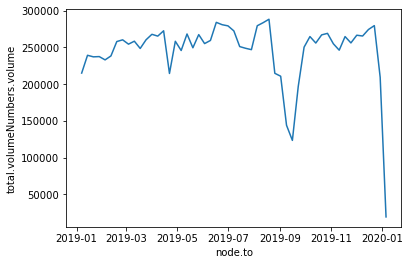

In [487]:
sns.lineplot(data=df_week, x='node.to', y='total.volumeNumbers.volume')

In [488]:
df.index.dayofweek.unique()

Int64Index([1, 2, 3, 4, 5, 6, 0], dtype='int64', name='node.to')

In [489]:
df['dayofweek'] = df.index.dayofweek

In [490]:
df.head()

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0,1
2019-01-01 02:00:00+00:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0,1
2019-01-01 03:00:00+00:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0,1
2019-01-01 04:00:00+00:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0,1
2019-01-01 05:00:00+00:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0,1


<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

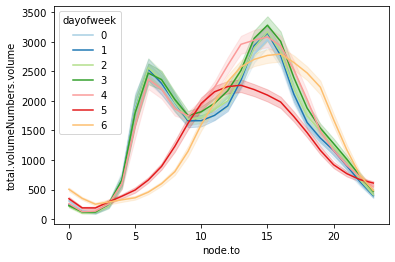

In [491]:

palette=sns.color_palette('Paired', n_colors=7)

sns.lineplot(x=df.index.hour, y=df['total.volumeNumbers.volume'], palette=palette, hue=df['dayofweek'])


## Analyserer om det er Outliers i datasettet

In [492]:
z_scores = stats.zscore(df['total.volumeNumbers.volume'])

In [493]:
z_scores.max()

2.7436496048363352

In [494]:
z_scores.min()

-1.4673337532608188

<AxesSubplot:xlabel='dayofweek', ylabel='total.volumeNumbers.volume'>

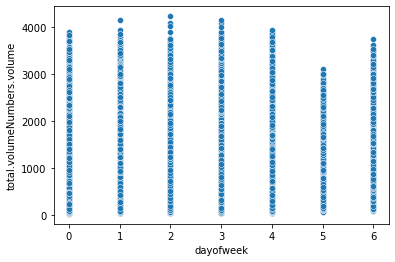

In [495]:
sns.scatterplot(data=df, x='dayofweek', y='total.volumeNumbers.volume')

## Import av resten av filene

In [496]:
# Importere og slår sammen alle csv filene som vi har fått.
filer_fra_tellepunkt = glob.glob('/home/bjogro/data-science-template/data/*.csv')

df_fra_hvert_tellepunkt = (pd.read_csv(f, sep=',') for f in filer_fra_tellepunkt)
df_total   = pd.concat(df_fra_hvert_tellepunkt, ignore_index=True)
del df_fra_hvert_tellepunkt

In [497]:
df_total['trafikk_id'].unique()

array(['30552V444220', '67263V1811577', '73894V444221', '79854V625215',
       '87610V1811579'], dtype=object)

In [498]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50565 entries, 0 to 50564
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   node.to                                50565 non-null  object 
 1   trafikk_id                             50565 non-null  object 
 2   total.volumeNumbers.volume             41669 non-null  float64
 3   total.volumeNumbers.volume[5.6,..)     39048 non-null  float64
 4   total.volumeNumbers.volume[5.6,7.6)    41669 non-null  float64
 5   total.volumeNumbers.volume[7.6,12.5)   41669 non-null  float64
 6   total.volumeNumbers.volume[12.5,16.0)  41669 non-null  float64
 7   total.volumeNumbers.volume[16.0,24.0)  41669 non-null  float64
 8   total.volumeNumbers.volume[24.0,..)    41669 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.5+ MB


In [499]:
#gjør om node.to til et pandas datetime format
df_total['node.to'] = pd.to_datetime(df_total['node.to'], utc=True)

In [500]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50565 entries, 0 to 50564
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   node.to                                50565 non-null  datetime64[ns, UTC]
 1   trafikk_id                             50565 non-null  object             
 2   total.volumeNumbers.volume             41669 non-null  float64            
 3   total.volumeNumbers.volume[5.6,..)     39048 non-null  float64            
 4   total.volumeNumbers.volume[5.6,7.6)    41669 non-null  float64            
 5   total.volumeNumbers.volume[7.6,12.5)   41669 non-null  float64            
 6   total.volumeNumbers.volume[12.5,16.0)  41669 non-null  float64            
 7   total.volumeNumbers.volume[16.0,24.0)  41669 non-null  float64            
 8   total.volumeNumbers.volume[24.0,..)    41669 non-null  float64            
dtypes: date

In [501]:
type(df_total['total.volumeNumbers.volume'].iloc[1])

numpy.float64

In [502]:
# setter node.to som index for dataframe
df_total = df_total.set_index('node.to')

In [503]:
df_total.index.dayofweek.unique()

Int64Index([1, 2, 3, 4, 5, 6, 0], dtype='int64', name='node.to')

In [504]:
df_total['dayofweek'] = df_total.index.dayofweek

In [505]:
df_total[df_total['dayofweek'] == 1]

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0,1
2019-01-01 02:00:00+00:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0,1
2019-01-01 03:00:00+00:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0,1
2019-01-01 04:00:00+00:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0,1
2019-01-01 05:00:00+00:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0,1
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,87610V1811579,127.0,15.0,4.0,1.0,5.0,5.0,0.0,1
2019-12-31 20:00:00+00:00,87610V1811579,84.0,10.0,0.0,1.0,2.0,7.0,0.0,1
2019-12-31 21:00:00+00:00,87610V1811579,88.0,8.0,1.0,3.0,1.0,3.0,0.0,1


In [506]:
df_isnull = df_total.isnull()

dvs at det er 2733 linjer som ikke har tellinger i seg.  Dette kan væer ett problem

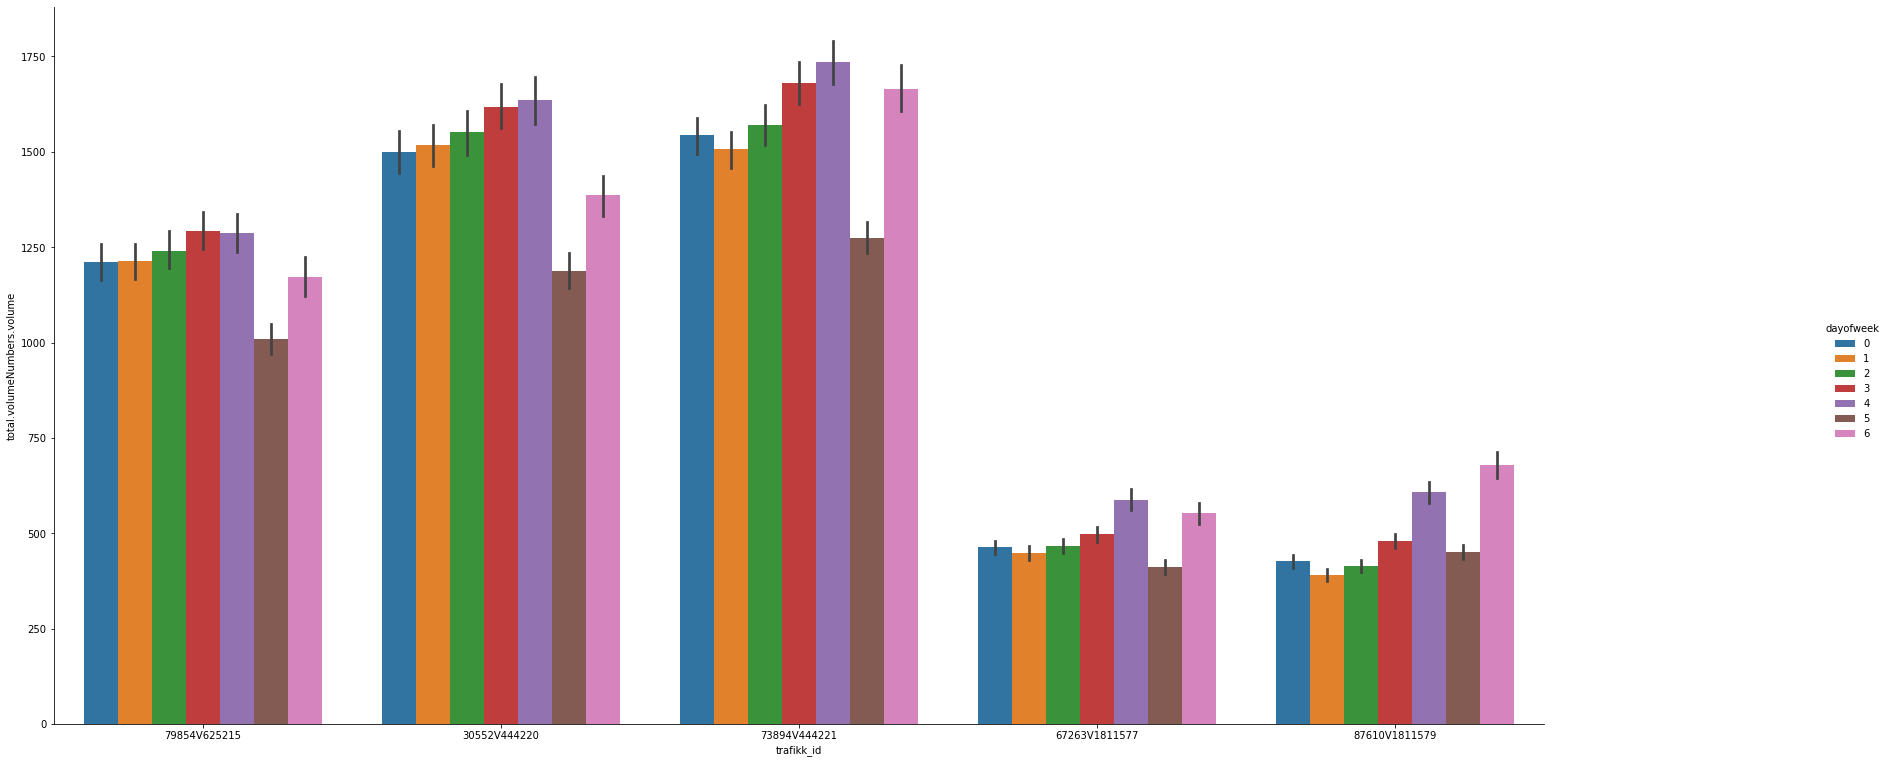

In [507]:


g = sns.catplot(kind = 'bar', y='total.volumeNumbers.volume', x= 'trafikk_id', data = df_total, hue = 'dayofweek', order = ['79854V625215','30552V444220', '73894V444221', '67263V1811577', '87610V1811579']   )#[df_total['dayofweek'] == 6] )
#sns.set(rc={'figure.figsize':(11.7,40.27)})



g.fig.set_figwidth(30.27)
g.fig.set_figheight(11.7)

In [508]:
df_totalweek = df.resample('D').sum()

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

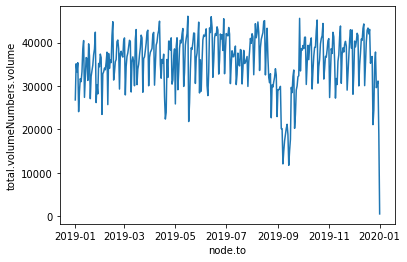

In [509]:
sns.lineplot(data=df_totalweek, x='node.to', y='total.volumeNumbers.volume')

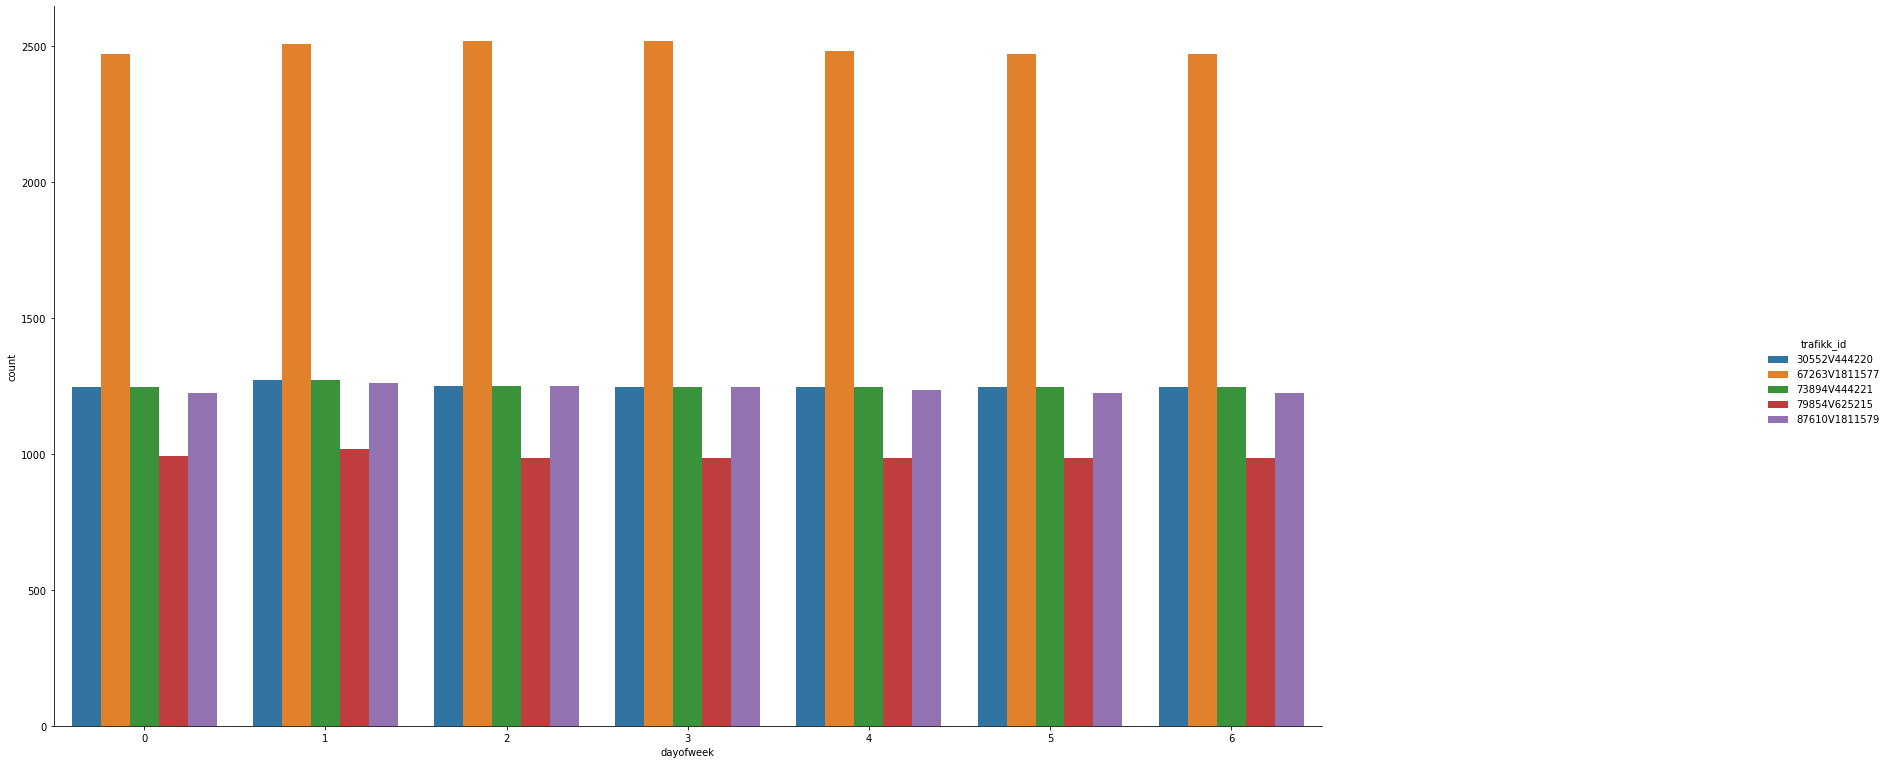

In [510]:
w = sns.catplot(kind = 'count', x= 'dayofweek', data = df_total, hue = 'trafikk_id')#[df_total['dayofweek'] == 6] )
#sns.set(rc={'figure.figsize':(11.7,40.27)})



w.fig.set_figwidth(30.27)
w.fig.set_figheight(11.7)

In [511]:
#palette=sns.color_palette('Paired', n_colors=7)

#b=sns.barplot(x=df_total.index, y=df_total['total.volumeNumbers.volume'], palette=palette, hue=df_total['trafikk_id'])
#b.fig.set_figwidth(30.27)
#b.fig.set_figheight(11.7)

In [512]:
df_isnull.index.strftime('%Y%m')

Index(['201901', '201901', '201901', '201901', '201901', '201901', '201901',
       '201901', '201901', '201901',
       ...
       '201912', '201912', '201912', '201912', '201912', '201912', '201912',
       '201912', '201912', '202001'],
      dtype='object', name='node.to', length=50565)

In [513]:
df_isnull.head()

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 02:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 03:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 04:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 05:00:00+00:00,False,False,False,False,False,False,False,False,False


In [514]:
df_isnull['trafikk_id'] = df_total['trafikk_id']

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

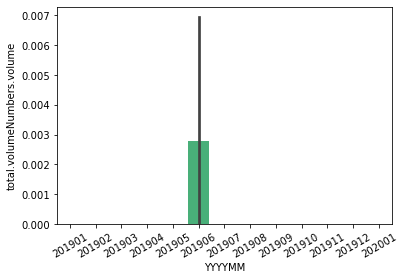

In [515]:
#plotter manglende registeringer for Leirelva bru punktet


df_isnull['YYYYMM'] = df_isnull.index.strftime('%Y%m')
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '30552V444220' ] )

ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001'),
 Text(13, 0, '202002'),
 Text(14, 0, '202003'),
 Text(15, 0, '202004'),
 Text(16, 0, '202005'),
 Text(17, 0, '202006'),
 Text(18, 0, '202007'),
 Text(19, 0, '202008'),
 Text(20, 0, '202009'),
 Text(21, 0, '202010'),
 Text(22, 0, '202011'),
 Text(23, 0, '202012'),
 Text(24, 0, '202101')]

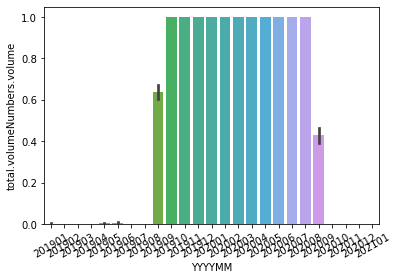

In [516]:
##plotter manglende registeringer for Mogriena punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '67263V1811577' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

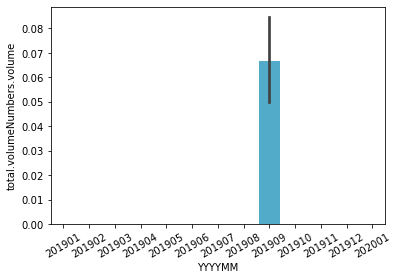

In [517]:
#plotter manglende registeringer for Jessheim punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '73894V444221' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201910'),
 Text(9, 0, '201911'),
 Text(10, 0, '201912'),
 Text(11, 0, '202001')]

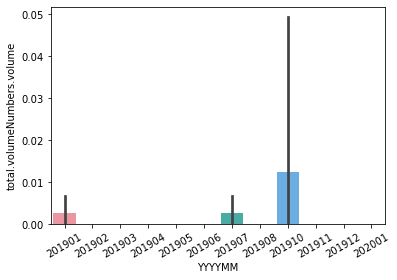

In [518]:
#plotter manglende registeringer for Karihaugen punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '79854V625215' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

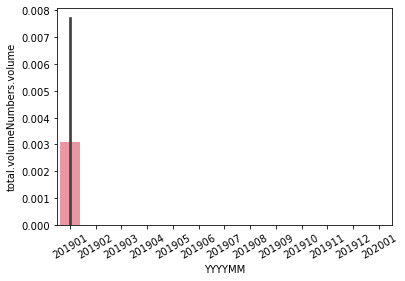

In [519]:
#plotter manglende registeringer for dalskrysset punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '87610V1811579' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [520]:
df_total.head()

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0,1
2019-01-01 02:00:00+00:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0,1
2019-01-01 03:00:00+00:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0,1
2019-01-01 04:00:00+00:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0,1
2019-01-01 05:00:00+00:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0,1


In [521]:
#df_total.drop(df_total['trafikk_id'] == '67263V1811577')

In [522]:
df_total['YYYYMM'] = df_total.index.strftime('%Y%m')

In [523]:
df_leirelva = df_total.loc[df_total['trafikk_id'] == '30552V444220']
df_jessheim = df_total.loc[df_total['trafikk_id'] == '73894V444221']
df_karihaugen = df_total.loc[df_total['trafikk_id'] == '79854V625215']
df_Dalskrysset = df_total.loc[df_total['trafikk_id'] == '87610V1811579']
df_mogreina = df_total.loc[df_total['trafikk_id'] == '67263V1811577']

In [524]:
df_4p = df_total.loc[df_total['trafikk_id'] != '67263V1811577']

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

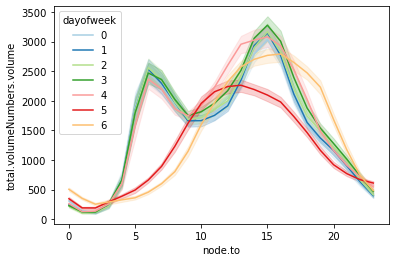

In [525]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_leirelva.index.hour, y=df_leirelva['total.volumeNumbers.volume'], palette=palette, hue=df_leirelva['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

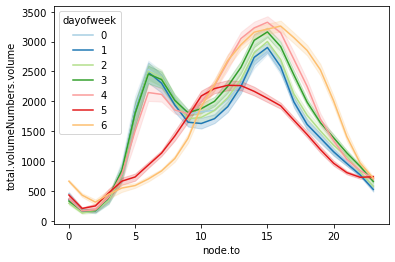

In [526]:
palette=sns.color_palette('Paired', n_colors=7)
#sns.set_style('gist_rainbow')
#sns.set_palette(sns.color_palette("Greens"))
sns.lineplot(x=df_jessheim.index.hour, y=df_jessheim['total.volumeNumbers.volume'], palette=palette, hue=df_jessheim['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

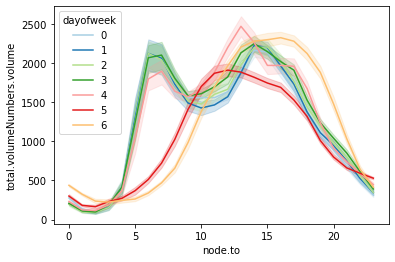

In [527]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_karihaugen.index.hour, y=df_karihaugen['total.volumeNumbers.volume'], palette=palette, hue=df_karihaugen['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

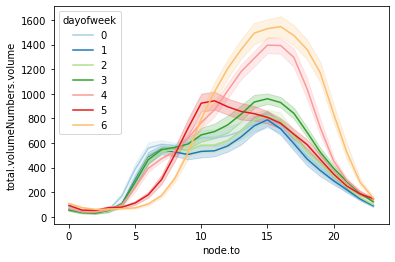

In [528]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_Dalskrysset.index.hour, y=df_Dalskrysset['total.volumeNumbers.volume'], palette=palette, hue=df_Dalskrysset['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

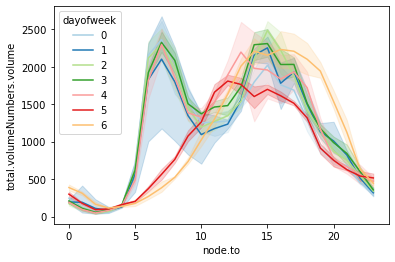

In [529]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_karihaugen2.index.hour, y=df_karihaugen2['total.volumeNumbers.volume'], palette=palette, hue=df_karihaugen2['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume[16.0,24.0)'>

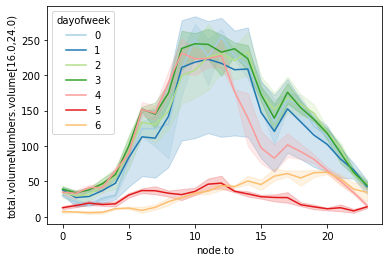

In [530]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_karihaugen2.index.hour, y=df_karihaugen2['total.volumeNumbers.volume[16.0,24.0)'], palette=palette, hue=df_karihaugen2['dayofweek'])

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

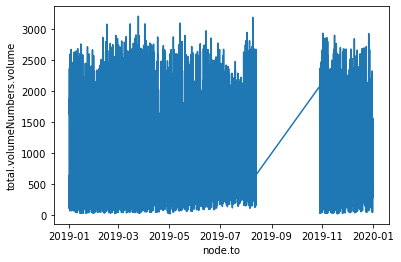

In [531]:
sns.lineplot(data=df_karihaugen, x='node.to', y='total.volumeNumbers.volume')

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

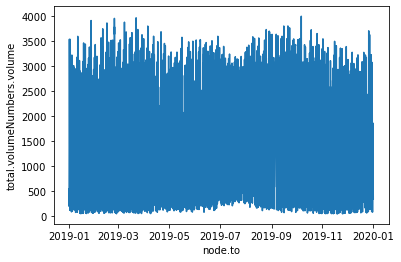

In [532]:
sns.lineplot(data=df_jessheim , x='node.to', y='total.volumeNumbers.volume')

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

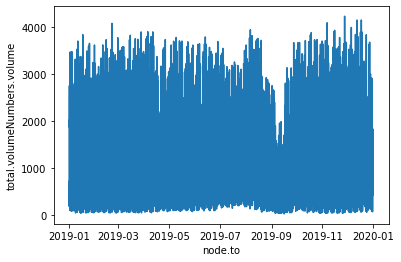

In [533]:
sns.lineplot(data=df_leirelva , x='node.to', y='total.volumeNumbers.volume')

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

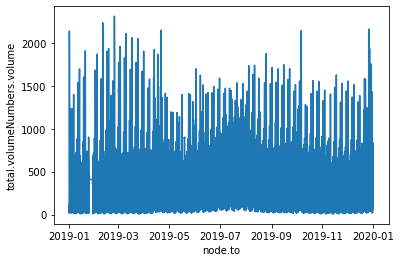

In [534]:
sns.lineplot(data=df_Dalskrysset  , x='node.to', y='total.volumeNumbers.volume')

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

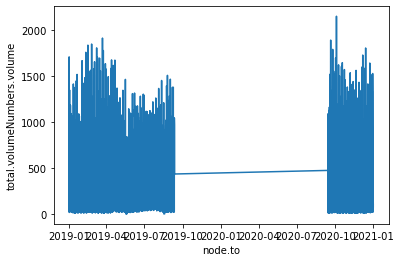

In [535]:
sns.lineplot(data=df_mogreina  , x='node.to', y='total.volumeNumbers.volume')

In [536]:
import matplotlib.pyplot as plt

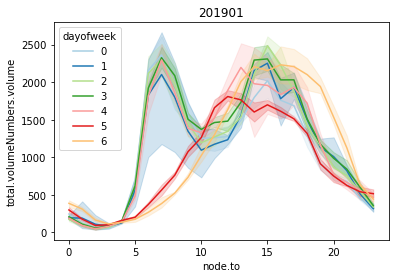

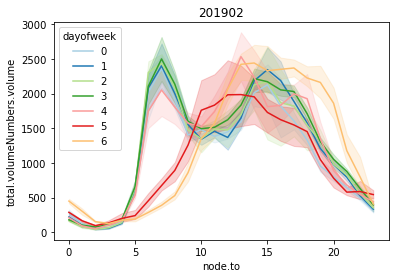

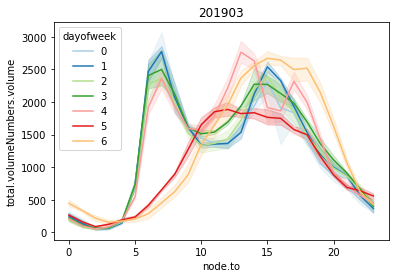

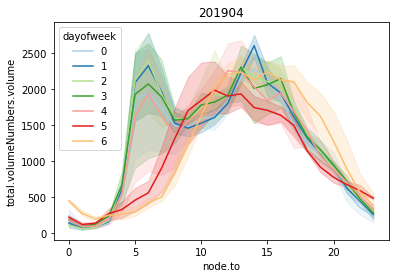

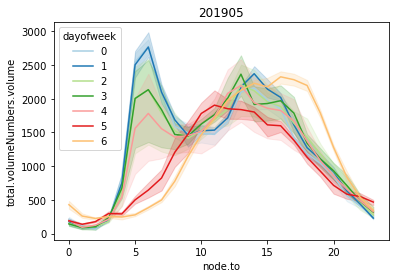

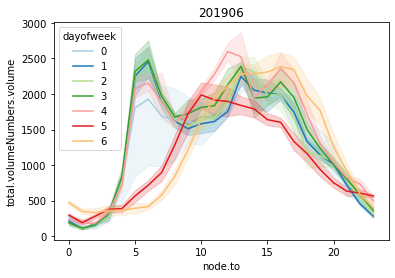

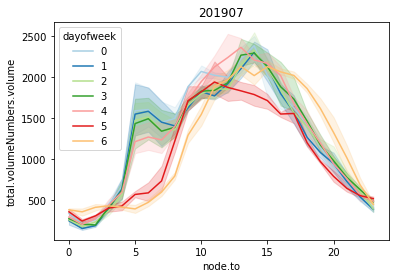

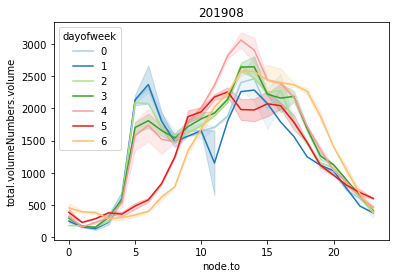

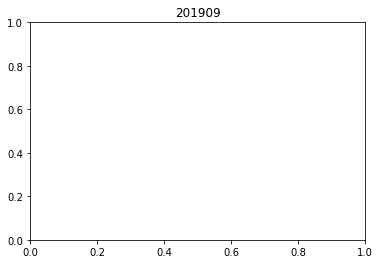

ValueError: The palette list has the wrong number of colors.

In [537]:
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_karihaugen[df_karihaugen['YYYYMM'] == i]
    l.append(df_plot)
    
    
    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    
    plt.show()
print(len(l))

In [ ]:
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_jessheim[df_jessheim['YYYYMM'] == i]
    l.append(df_plot)
    
    
    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    
    plt.show()
print(len(l))

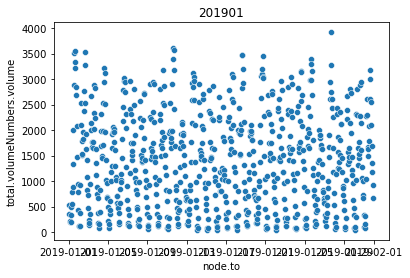

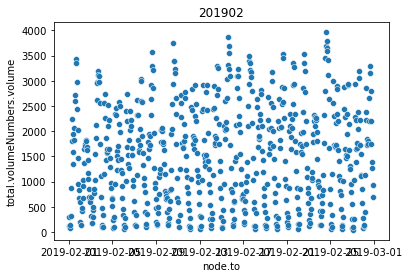

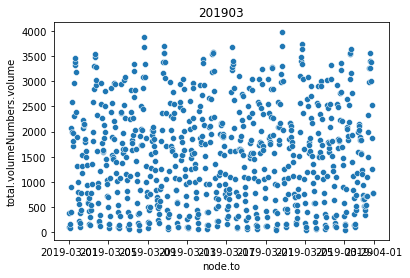

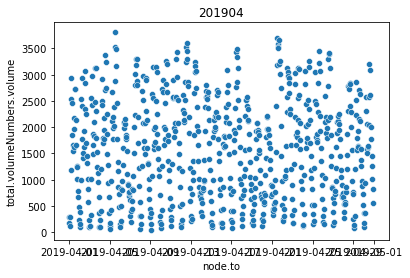

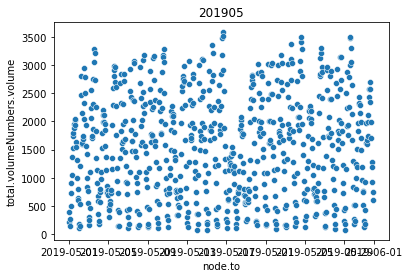

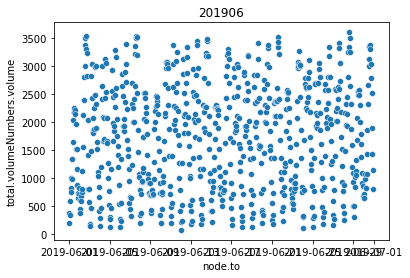

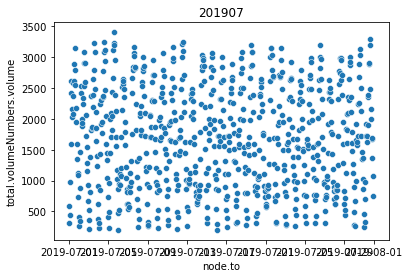

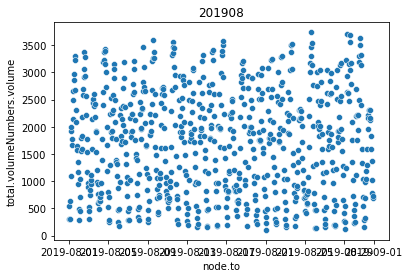

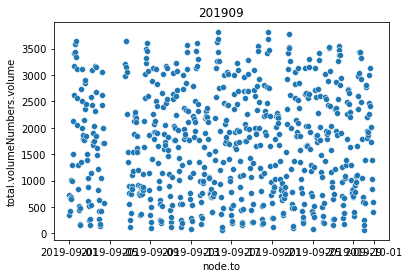

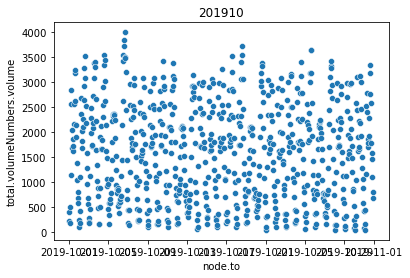

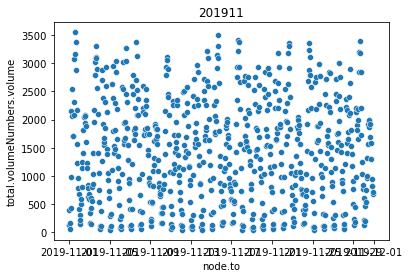

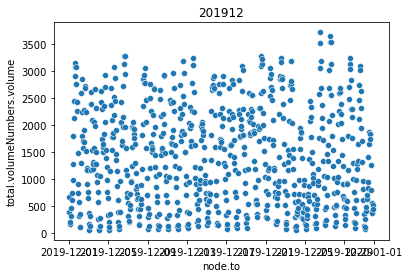

12


In [339]:
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_jessheim[df_jessheim['YYYYMM'] == i]
    l.append(df_plot)
    
    
    sns.scatterplot(data=df_plot , x='node.to', y='total.volumeNumbers.volume',).set_title(i)
    
    plt.show()
print(len(l))

In [338]:
df_plot = df_karihaugen[df_karihaugen['YYYYMM'] == '201901']

In [269]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2019-01-01 01:00:00+00:00 to 2019-01-31 23:00:00+00:00
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   trafikk_id                             743 non-null    object 
 1   total.volumeNumbers.volume             741 non-null    float64
 2   total.volumeNumbers.volume[5.6,..)     741 non-null    float64
 3   total.volumeNumbers.volume[5.6,7.6)    741 non-null    float64
 4   total.volumeNumbers.volume[7.6,12.5)   741 non-null    float64
 5   total.volumeNumbers.volume[12.5,16.0)  741 non-null    float64
 6   total.volumeNumbers.volume[16.0,24.0)  741 non-null    float64
 7   total.volumeNumbers.volume[24.0,..)    741 non-null    float64
 8   dayofweek                              743 non-null    int64  
 9   YYYYMM                                 743 non-null    object 
dtypes: float64(7), int64(1), 

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume[16.0,24.0)'>

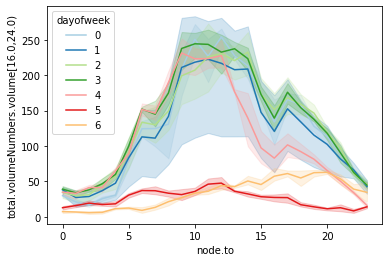

In [270]:
palette=sns.color_palette('Paired', n_colors=7)
sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume[16.0,24.0)'], palette=palette, hue=df_plot['dayofweek'])

In [158]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41781 entries, 2019-01-01 01:00:00+00:00 to 2020-01-01 00:00:00+00:00
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   trafikk_id                             41781 non-null  object 
 1   total.volumeNumbers.volume             39048 non-null  float64
 2   total.volumeNumbers.volume[5.6,..)     39048 non-null  float64
 3   total.volumeNumbers.volume[5.6,7.6)    39048 non-null  float64
 4   total.volumeNumbers.volume[7.6,12.5)   39048 non-null  float64
 5   total.volumeNumbers.volume[12.5,16.0)  39048 non-null  float64
 6   total.volumeNumbers.volume[16.0,24.0)  39048 non-null  float64
 7   total.volumeNumbers.volume[24.0,..)    39048 non-null  float64
 8   dayofweek                              41781 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 4.2+ MB


In [160]:
type(df_total.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [362]:
df_isnull.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41781 entries, 2019-01-01 01:00:00+00:00 to 2020-01-01 00:00:00+00:00
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   trafikk_id                             41781 non-null  object
 1   total.volumeNumbers.volume             41781 non-null  bool  
 2   total.volumeNumbers.volume[5.6,..)     41781 non-null  bool  
 3   total.volumeNumbers.volume[5.6,7.6)    41781 non-null  bool  
 4   total.volumeNumbers.volume[7.6,12.5)   41781 non-null  bool  
 5   total.volumeNumbers.volume[12.5,16.0)  41781 non-null  bool  
 6   total.volumeNumbers.volume[16.0,24.0)  41781 non-null  bool  
 7   total.volumeNumbers.volume[24.0,..)    41781 non-null  bool  
 8   dayofweek                              41781 non-null  bool  
 9   YYYYMM                                 41781 non-null  bool  
dtypes: bool(9), object(1)
memory usage:

In [379]:
df_notnull = (1-df_isnull['total.volumeNumbers.volume']) 
df_notnull = pd.concat([df_notnull, df_isnull['trafikk_id']], axis=1)




In [382]:
df_notnull

,total.volumeNumbers.volume,trafikk_id
node.to,,
2019-01-01 01:00:00+00:00,1,30552V444220
2019-01-01 02:00:00+00:00,1,30552V444220
2019-01-01 03:00:00+00:00,1,30552V444220
2019-01-01 04:00:00+00:00,1,30552V444220
2019-01-01 05:00:00+00:00,1,30552V444220
...,...,...
2019-12-31 20:00:00+00:00,1,87610V1811579
2019-12-31 21:00:00+00:00,1,87610V1811579
2019-12-31 22:00:00+00:00,1,87610V1811579


In [383]:
df_valuesdaily

,total.volumeNumbers.volume
node.to,
2019-01-01 00:00:00+00:00,115
2019-01-02 00:00:00+00:00,120
2019-01-03 00:00:00+00:00,120
2019-01-04 00:00:00+00:00,120
2019-01-05 00:00:00+00:00,120
...,...
2019-12-28 00:00:00+00:00,96
2019-12-29 00:00:00+00:00,96
2019-12-30 00:00:00+00:00,96


In [385]:
df_leirelva_null = df_notnull.loc[df_total['trafikk_id'] == '30552V444220']
df_jessheim_null = df_notnull.loc[df_total['trafikk_id'] == '73894V444221']
df_karihaugen_null = df_notnull.loc[df_total['trafikk_id'] == '79854V625215']
df_Dalskrysset_null = df_notnull.loc[df_total['trafikk_id'] == '87610V1811579']
df_mogreina_null = df_notnull.loc[df_total['trafikk_id'] == '67263V1811577']

In [401]:
df_valuesdaily_k = df_karihaugen_null.resample('D').sum()
df_valuesdaily_l = df_leirelva_null.resample('D').sum()
df_valuesdaily_j = df_jessheim_null.resample('D').sum()
df_valuesdaily_D = df_Dalskrysset_null.resample('D').sum()
df_valuesdaily_m = df_mogreina_null.resample('D').sum()

In [402]:
df_valuesdaily_l

,total.volumeNumbers.volume
node.to,
2019-01-01 00:00:00+00:00,23
2019-01-02 00:00:00+00:00,24
2019-01-03 00:00:00+00:00,24
2019-01-04 00:00:00+00:00,24
2019-01-05 00:00:00+00:00,24
...,...
2019-12-28 00:00:00+00:00,24
2019-12-29 00:00:00+00:00,24
2019-12-30 00:00:00+00:00,24


<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

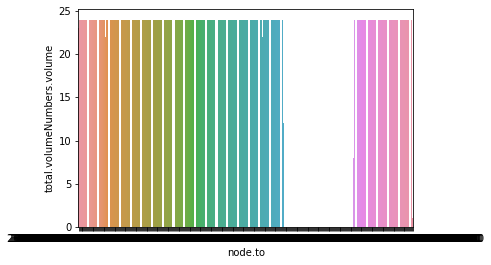

In [403]:
sns.barplot(x=df_valuesdaily_k.index, y='total.volumeNumbers.volume', data = df_valuesdaily )

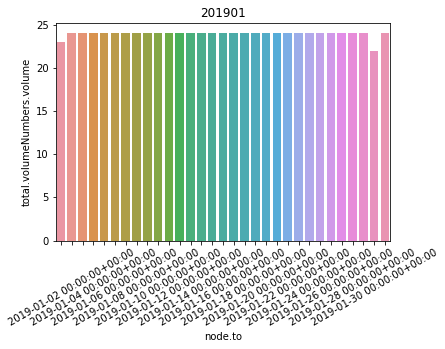

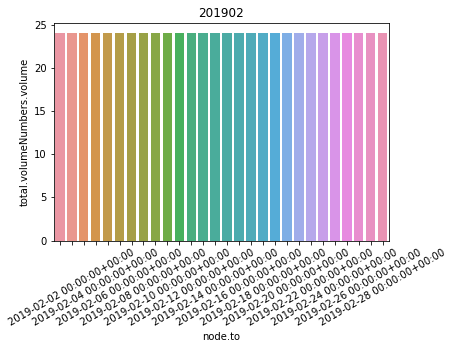

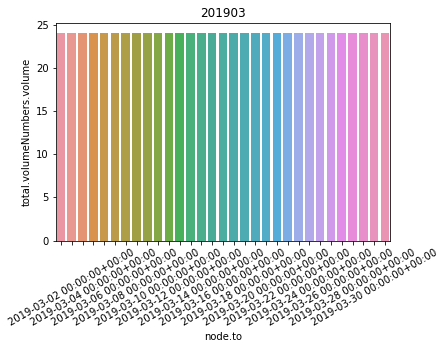

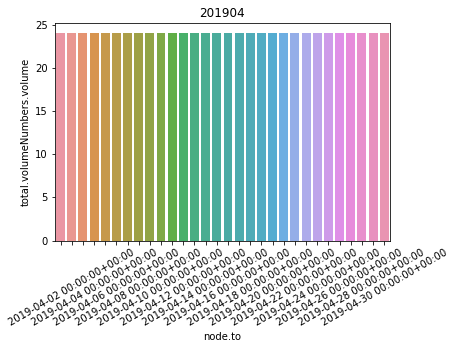

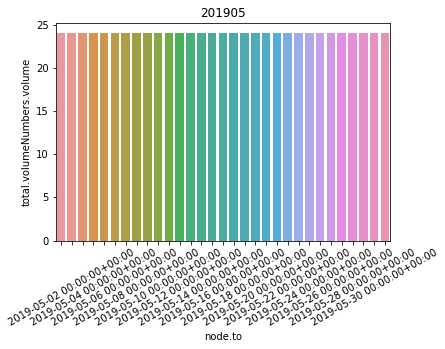

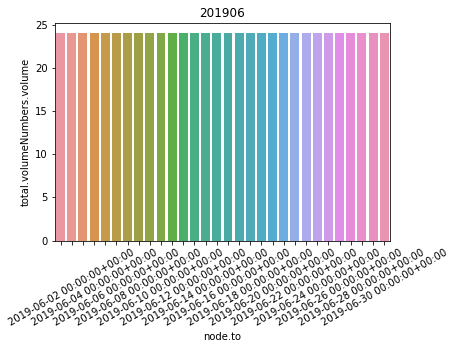

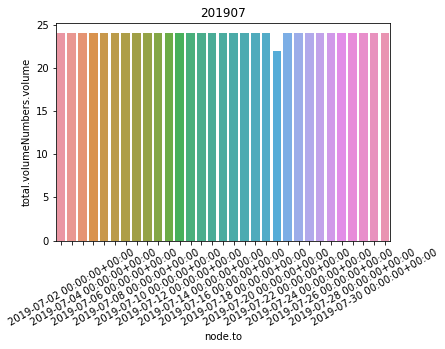

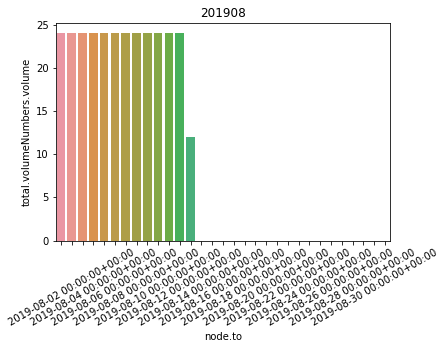

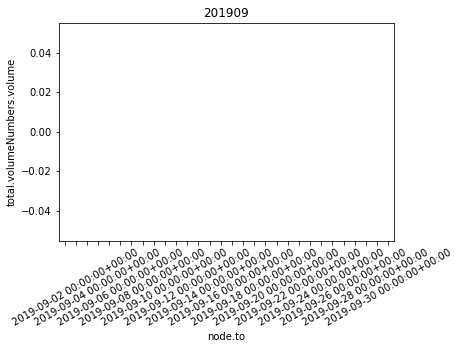

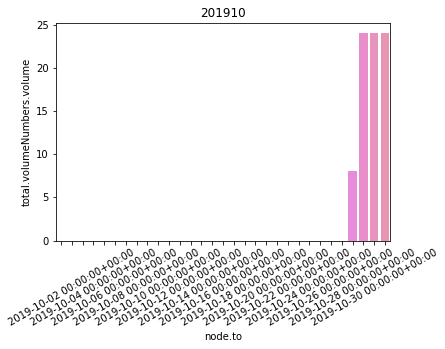

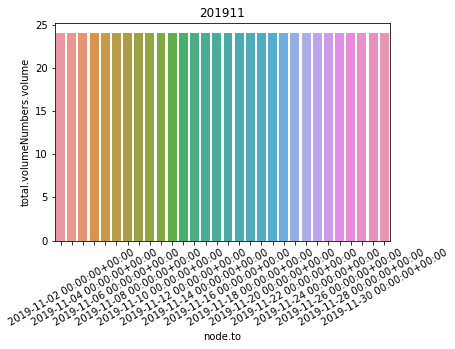

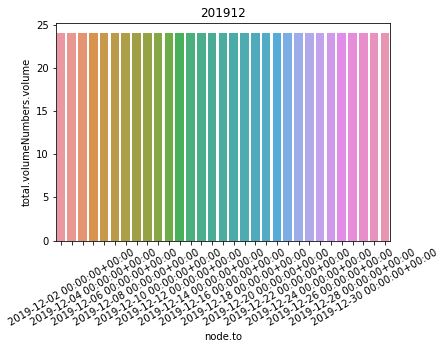

12


In [405]:
# Plotting av antall timer i døgnet det er registeringer (pr måned) på Karihaugen trafikkregisteringspunkt
df_valuesdaily_k['YYYYMM'] = df_valuesdaily_k.index.strftime('%Y%m')
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_valuesdaily_k[df_valuesdaily_k['YYYYMM'] == i]
    l.append(df_plot)
    
    ax = sns.barplot(x=df_plot.index, y='total.volumeNumbers.volume', data = df_plot )
    ax.set_title(i)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.show()
print(len(l))



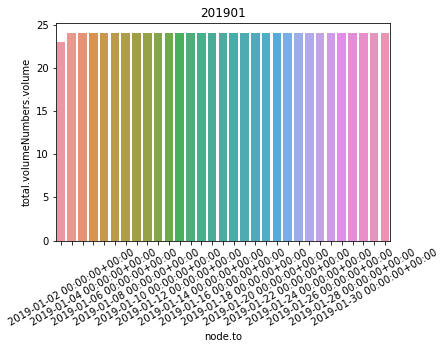

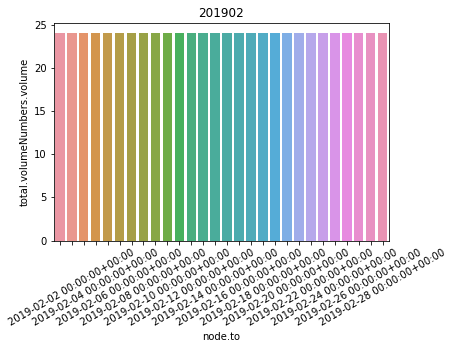

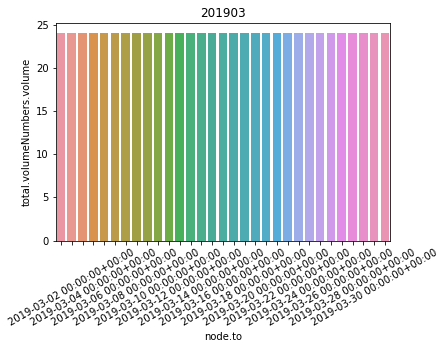

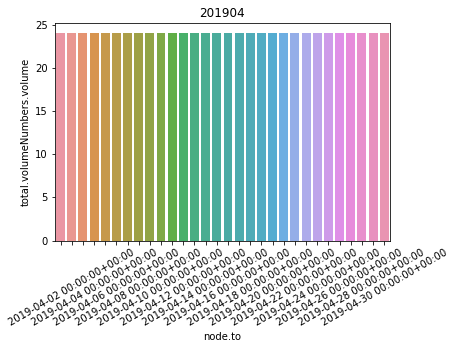

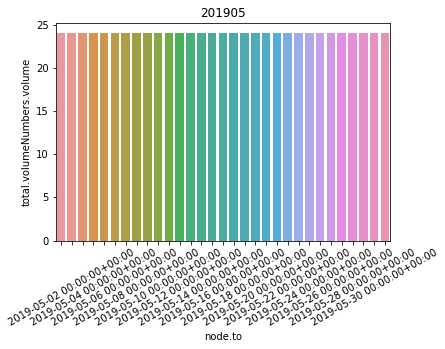

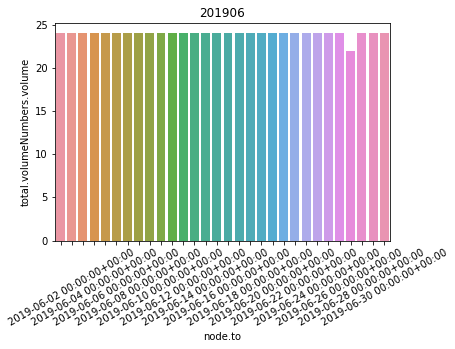

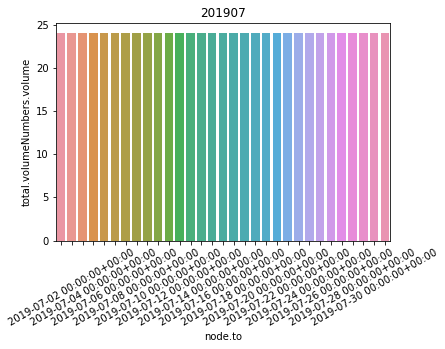

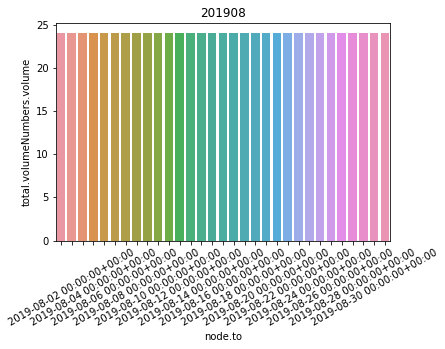

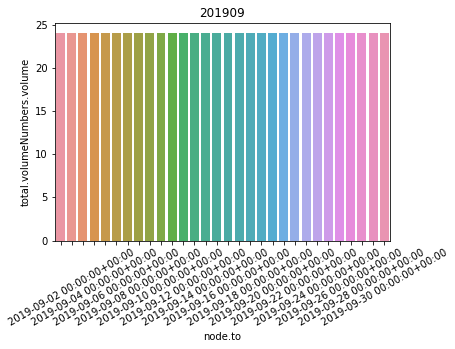

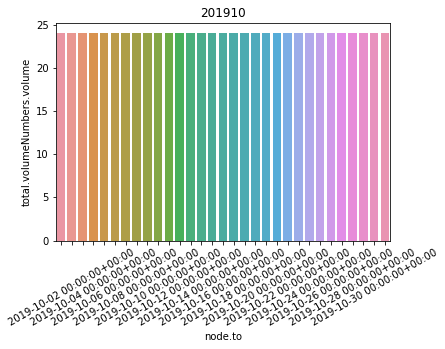

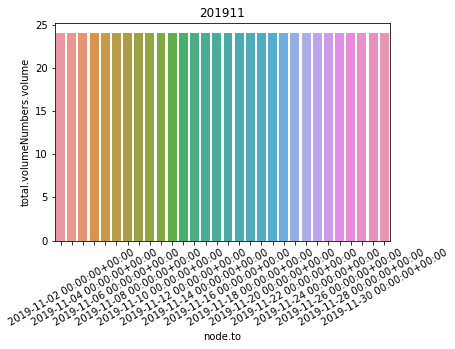

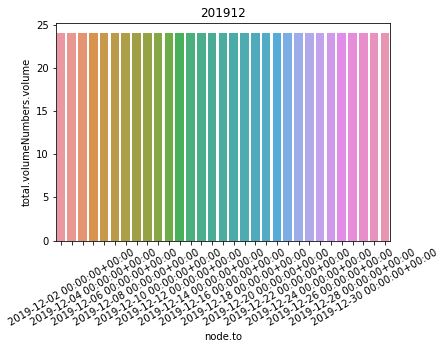

12


In [406]:
# Plotting av antall timer i døgnet det er registeringer (pr måned) på leirevla bru trafikkregisteringspunkt
df_valuesdaily_l['YYYYMM'] = df_valuesdaily_l.index.strftime('%Y%m')
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_valuesdaily_l[df_valuesdaily_l['YYYYMM'] == i]
    l.append(df_plot)
    
    ax = sns.barplot(x=df_plot.index, y='total.volumeNumbers.volume', data = df_plot )
    ax.set_title(i)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.show()
print(len(l))

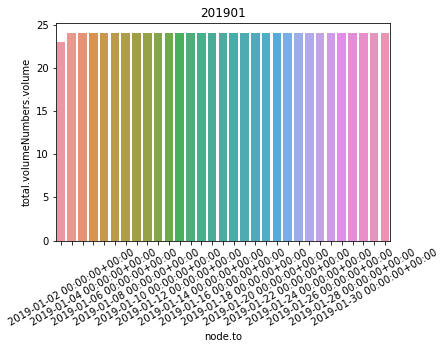

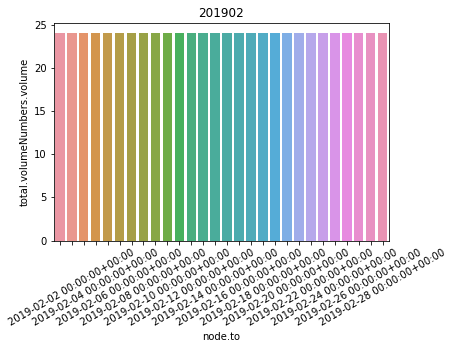

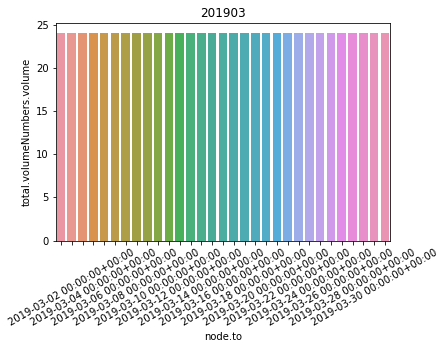

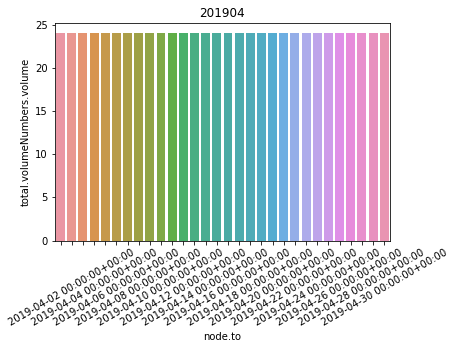

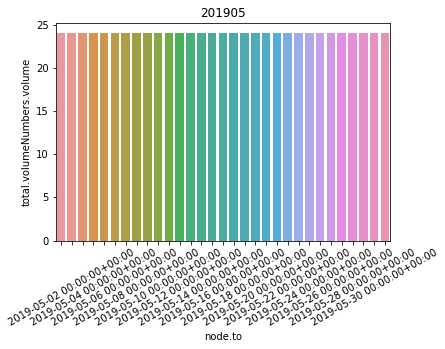

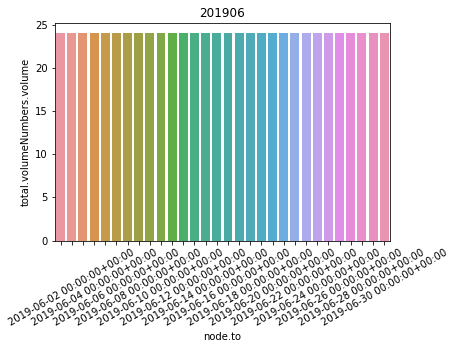

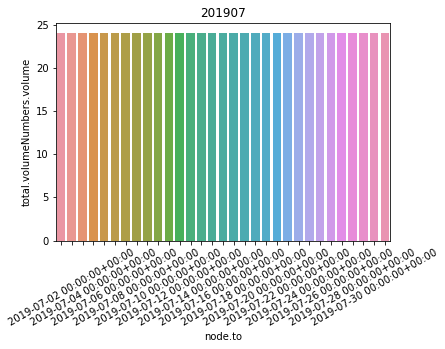

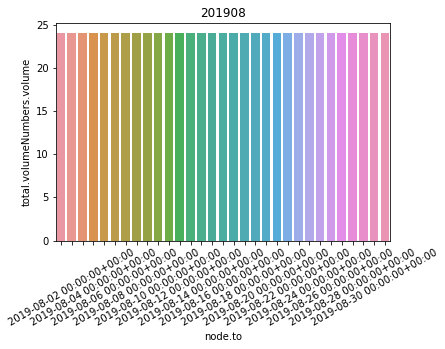

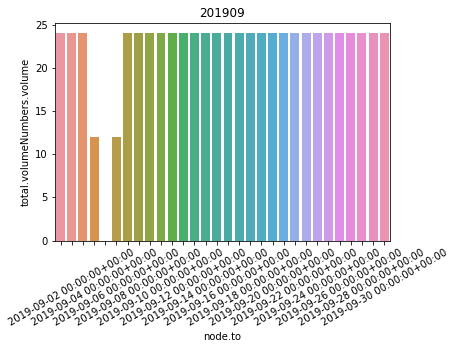

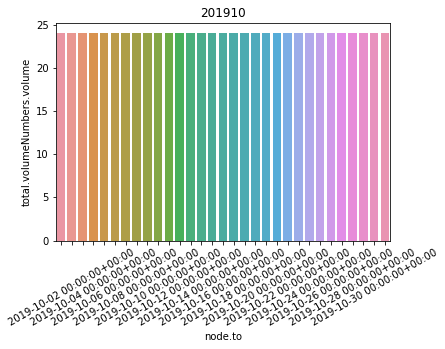

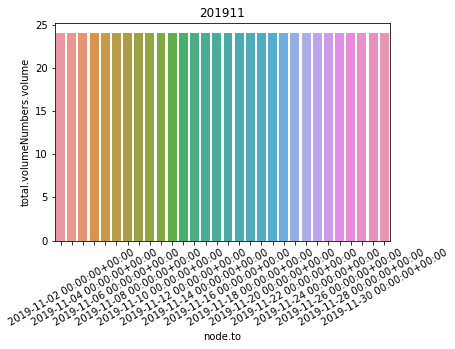

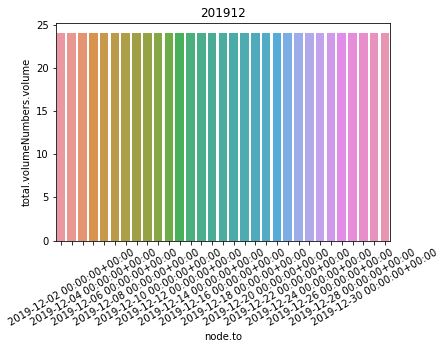

12


In [407]:
# Plotting av antall timer i døgnet det er registeringer (pr måned) på Jessheim trafikkregisteringspunkt
df_valuesdaily_j['YYYYMM'] = df_valuesdaily_j.index.strftime('%Y%m')
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_valuesdaily_j[df_valuesdaily_j['YYYYMM'] == i]
    l.append(df_plot)
    
    ax = sns.barplot(x=df_plot.index, y='total.volumeNumbers.volume', data = df_plot )
    ax.set_title(i)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.show()
print(len(l))

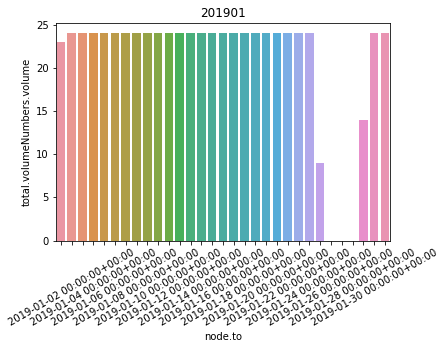

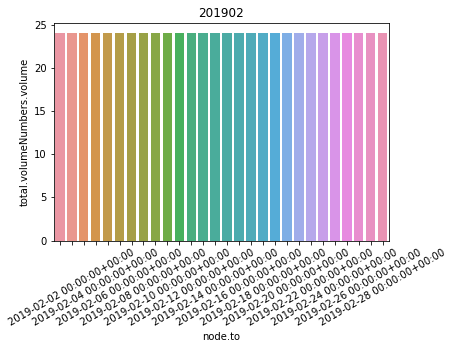

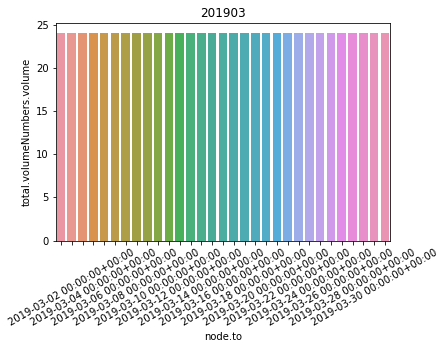

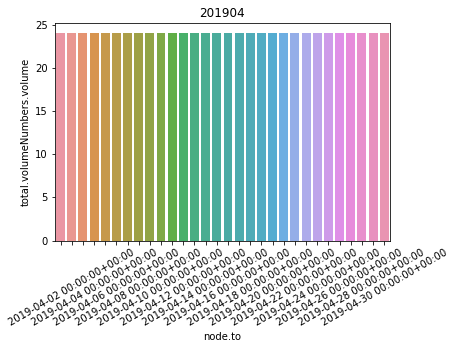

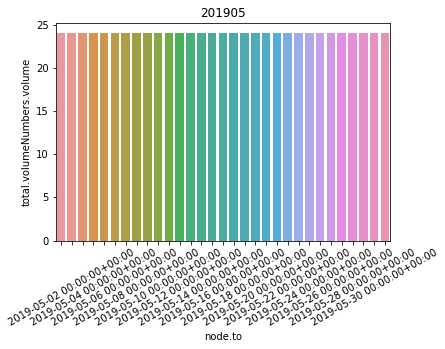

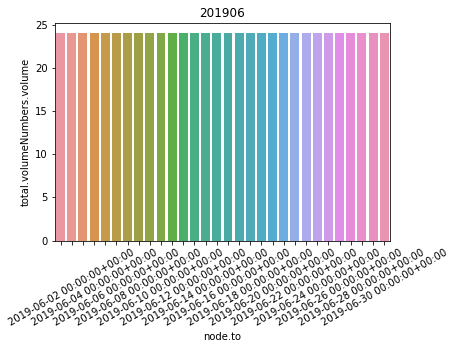

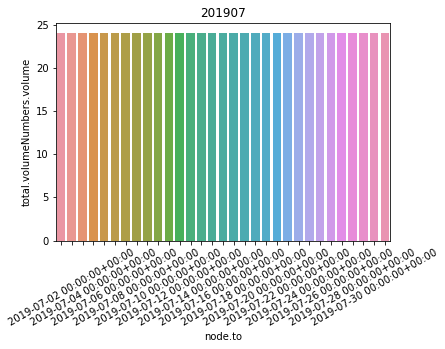

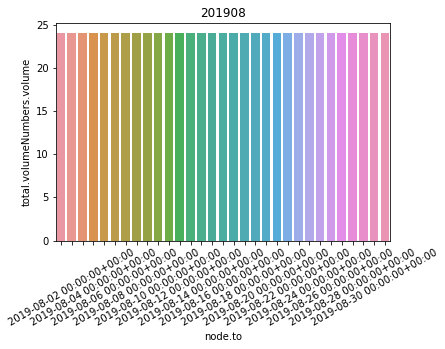

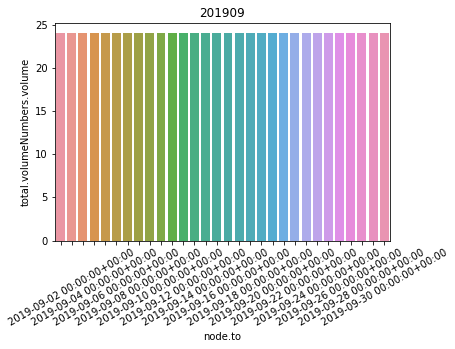

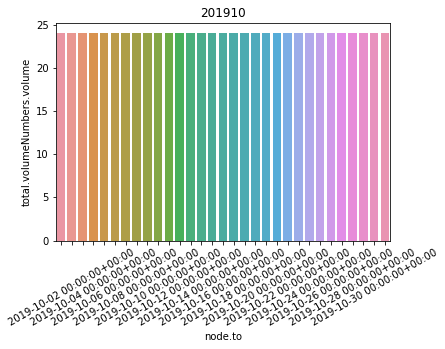

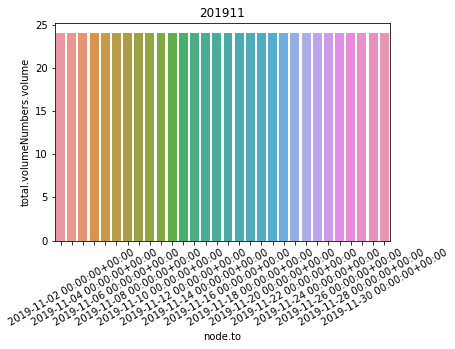

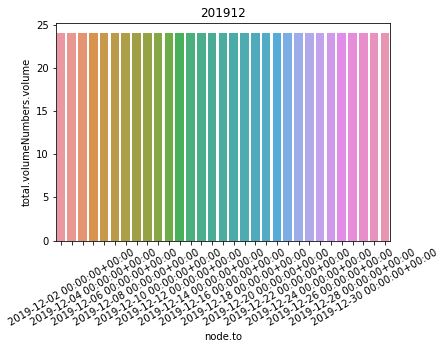

12


In [408]:
# Plotting av antall timer i døgnet det er registeringer (pr måned) på Dalskrysset trafikkregisteringspunkt
df_valuesdaily_D['YYYYMM'] = df_valuesdaily_D.index.strftime('%Y%m')
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_valuesdaily_D[df_valuesdaily_D['YYYYMM'] == i]
    l.append(df_plot)
    
    ax = sns.barplot(x=df_plot.index, y='total.volumeNumbers.volume', data = df_plot )
    ax.set_title(i)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.show()
print(len(l))

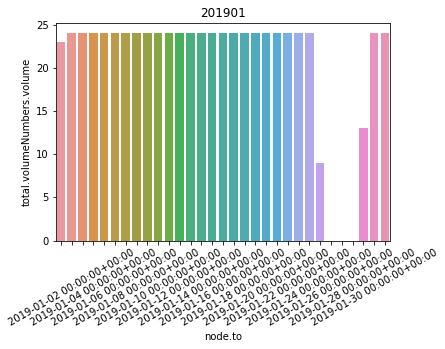

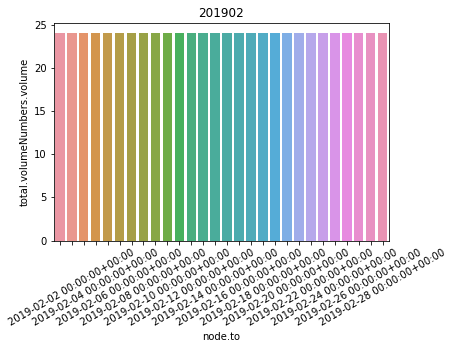

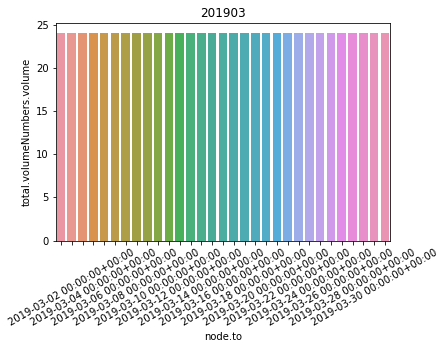

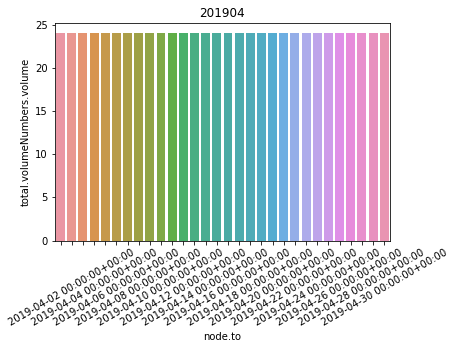

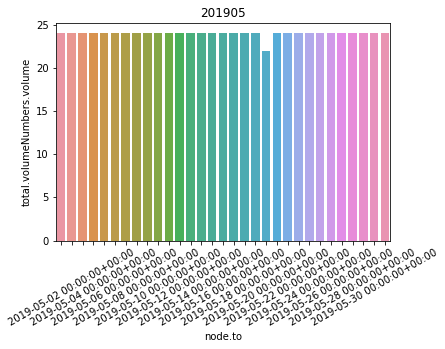

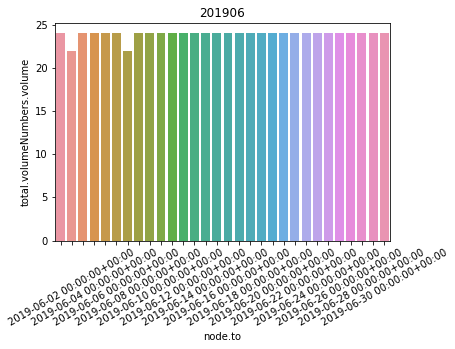

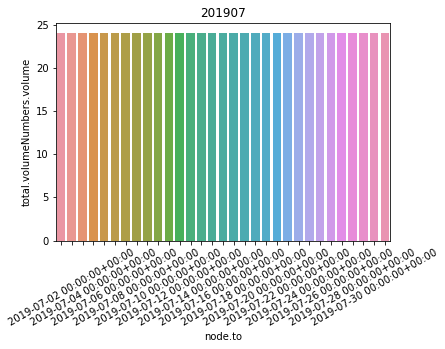

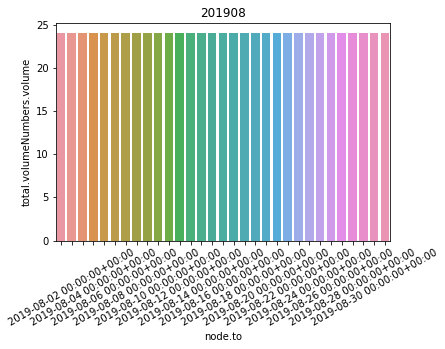

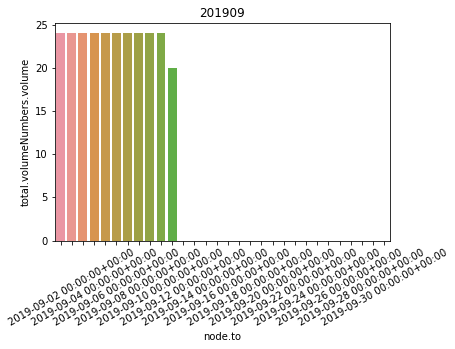

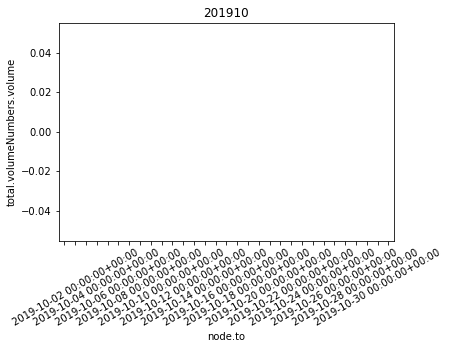

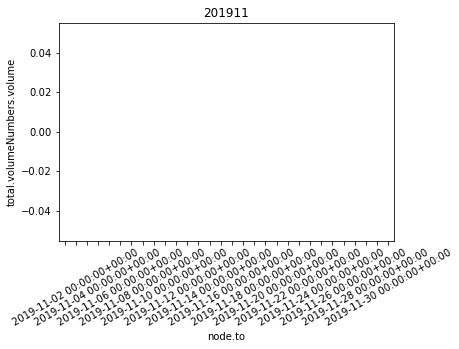

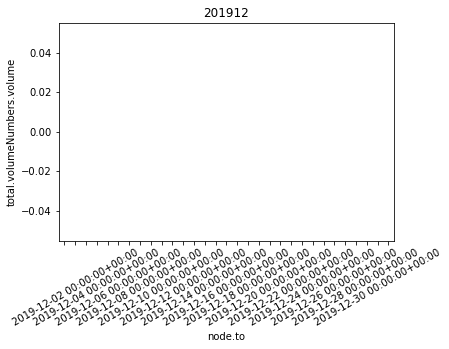

12


In [409]:
# Plotting av antall timer i døgnet det er registeringer (pr måned) på mogreina trafikkregisteringspunkt
df_valuesdaily_m['YYYYMM'] = df_valuesdaily_m.index.strftime('%Y%m')
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_valuesdaily_m[df_valuesdaily_m['YYYYMM'] == i]
    l.append(df_plot)
    
    ax = sns.barplot(x=df_plot.index, y='total.volumeNumbers.volume', data = df_plot )
    ax.set_title(i)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.show()
print(len(l))

In [411]:
df_total['YYYYMM'] = df_total.index.strftime('%Y%m')

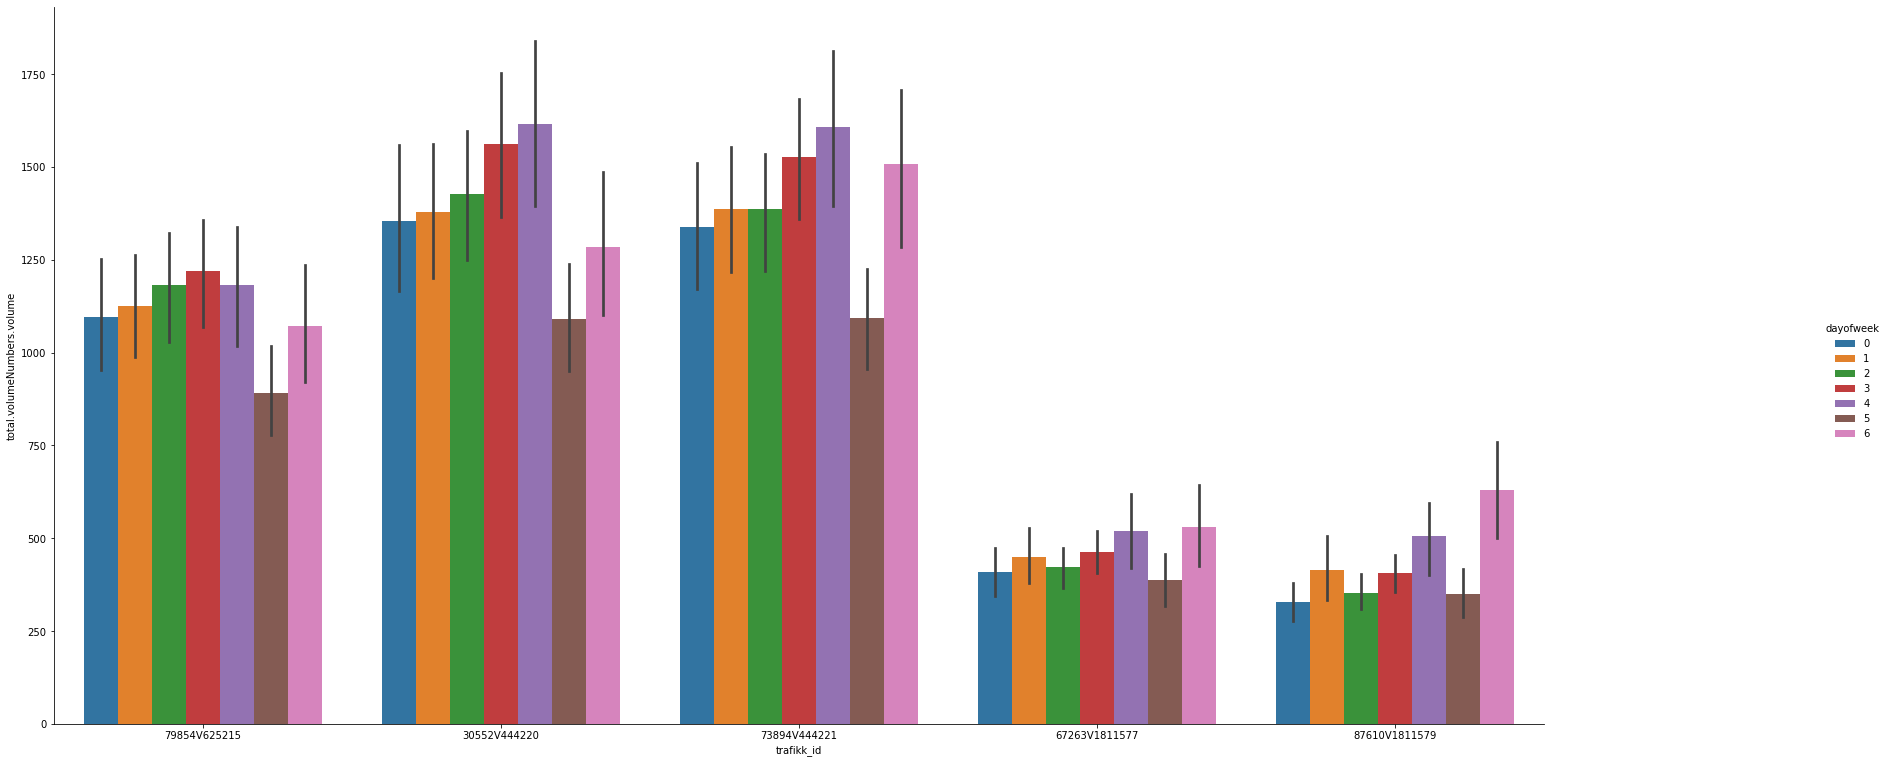

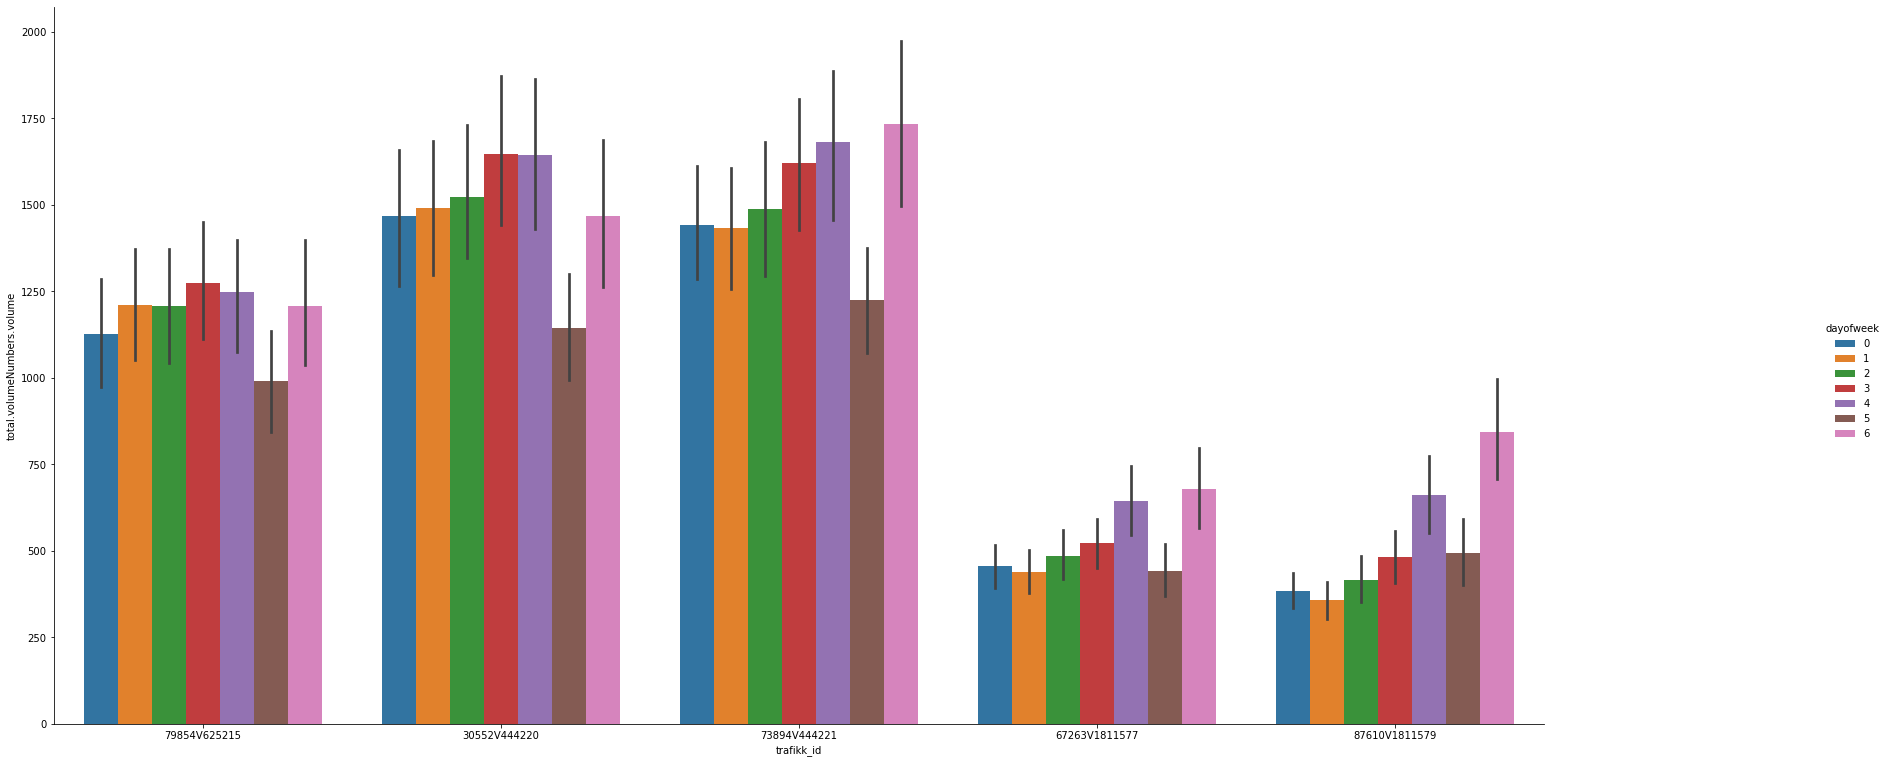

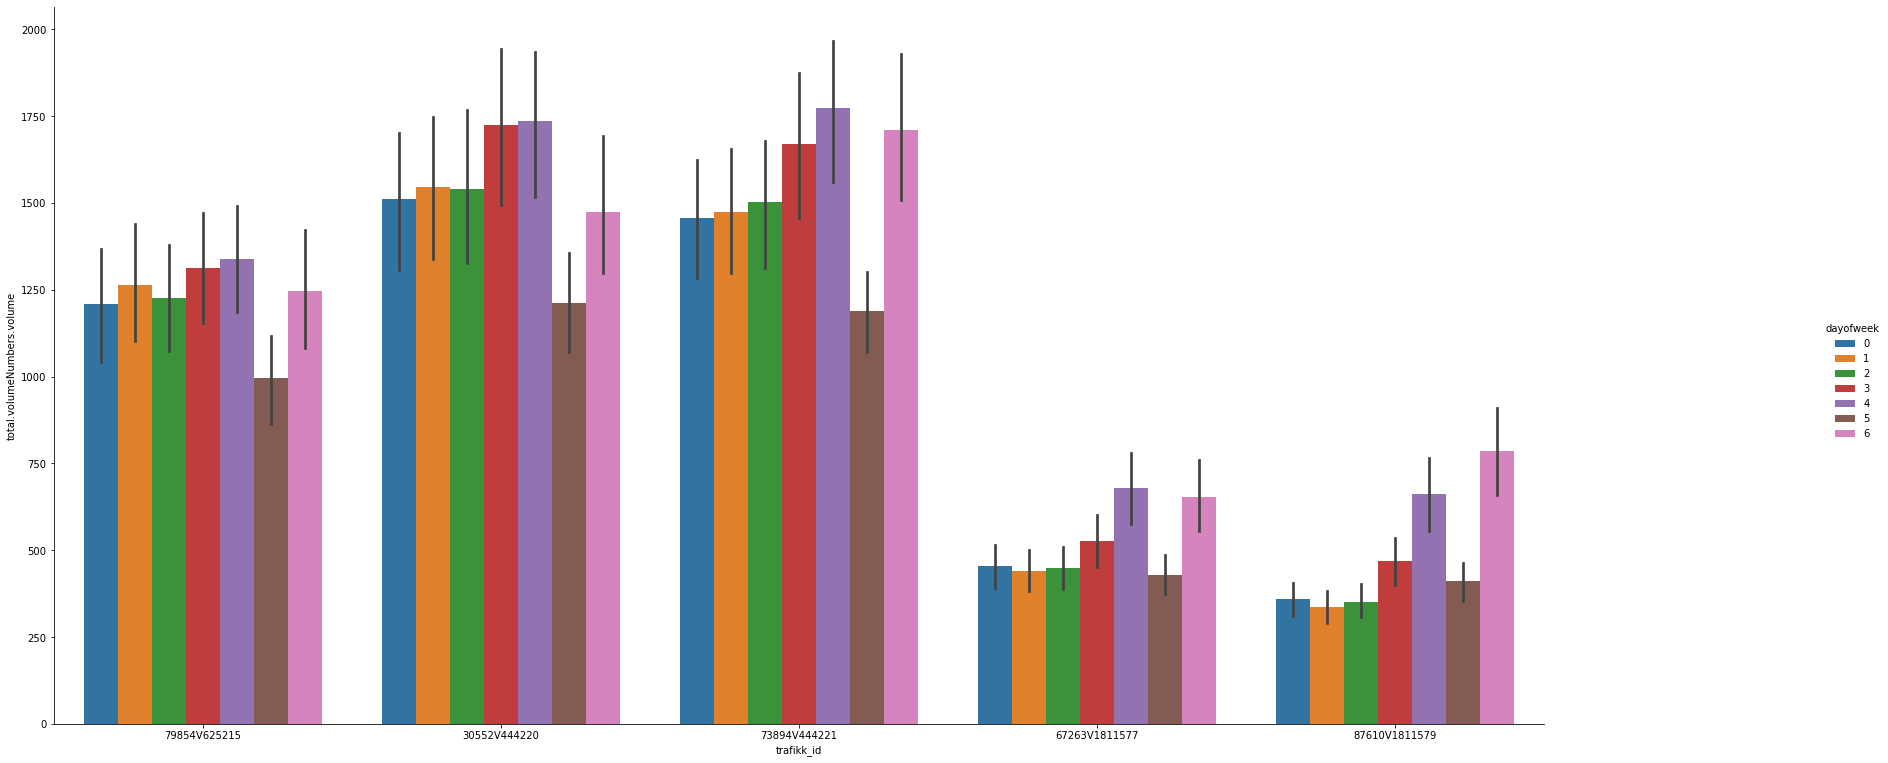

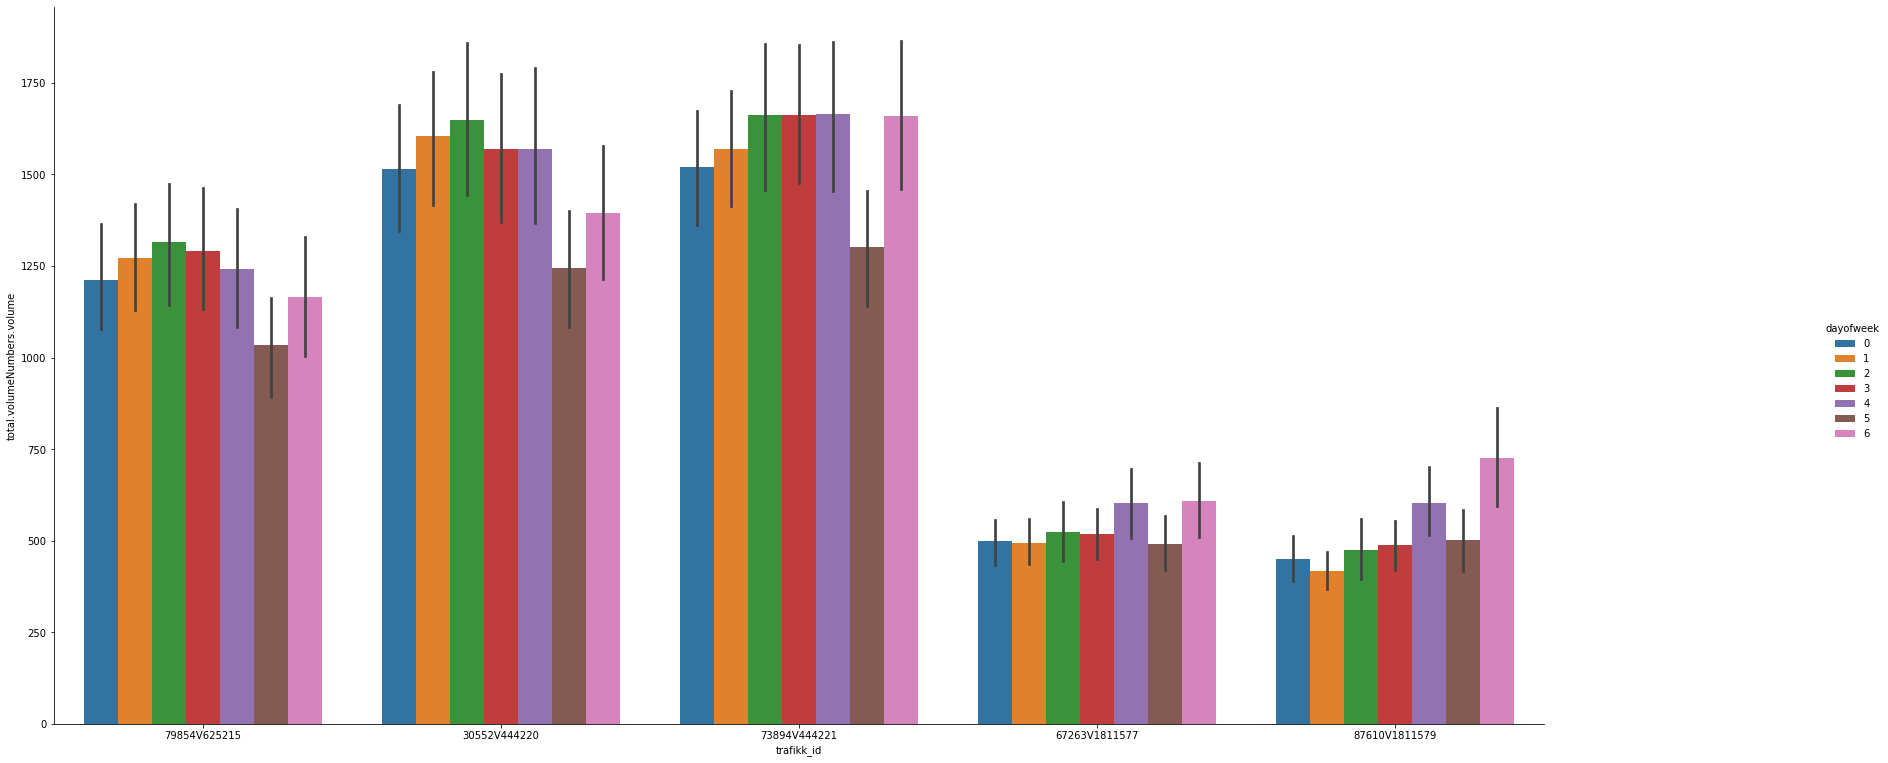

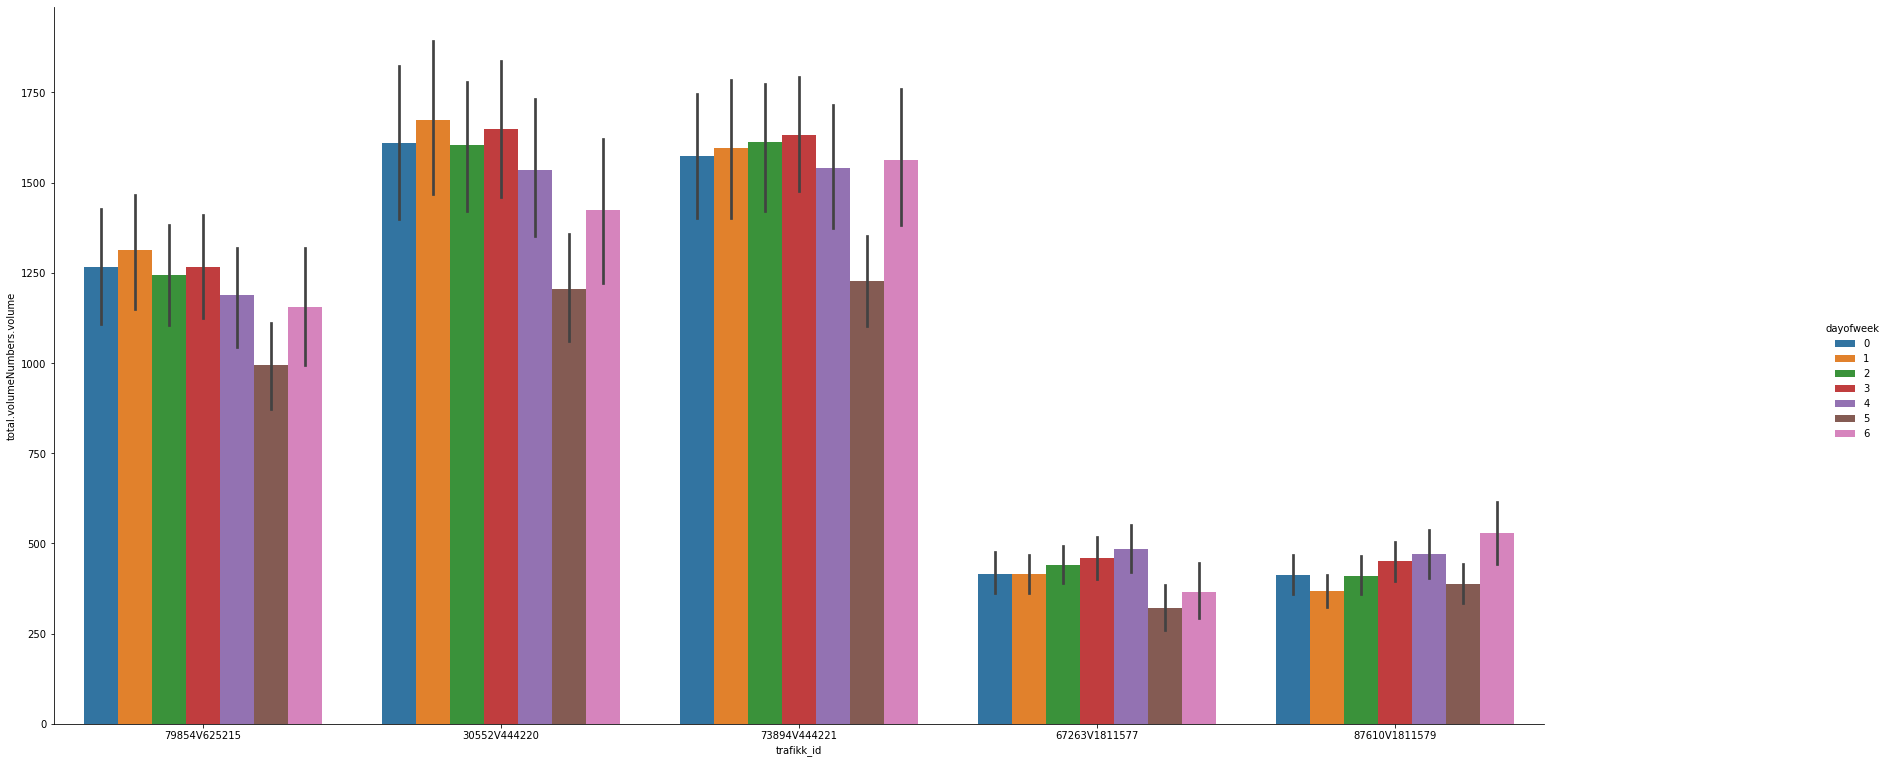

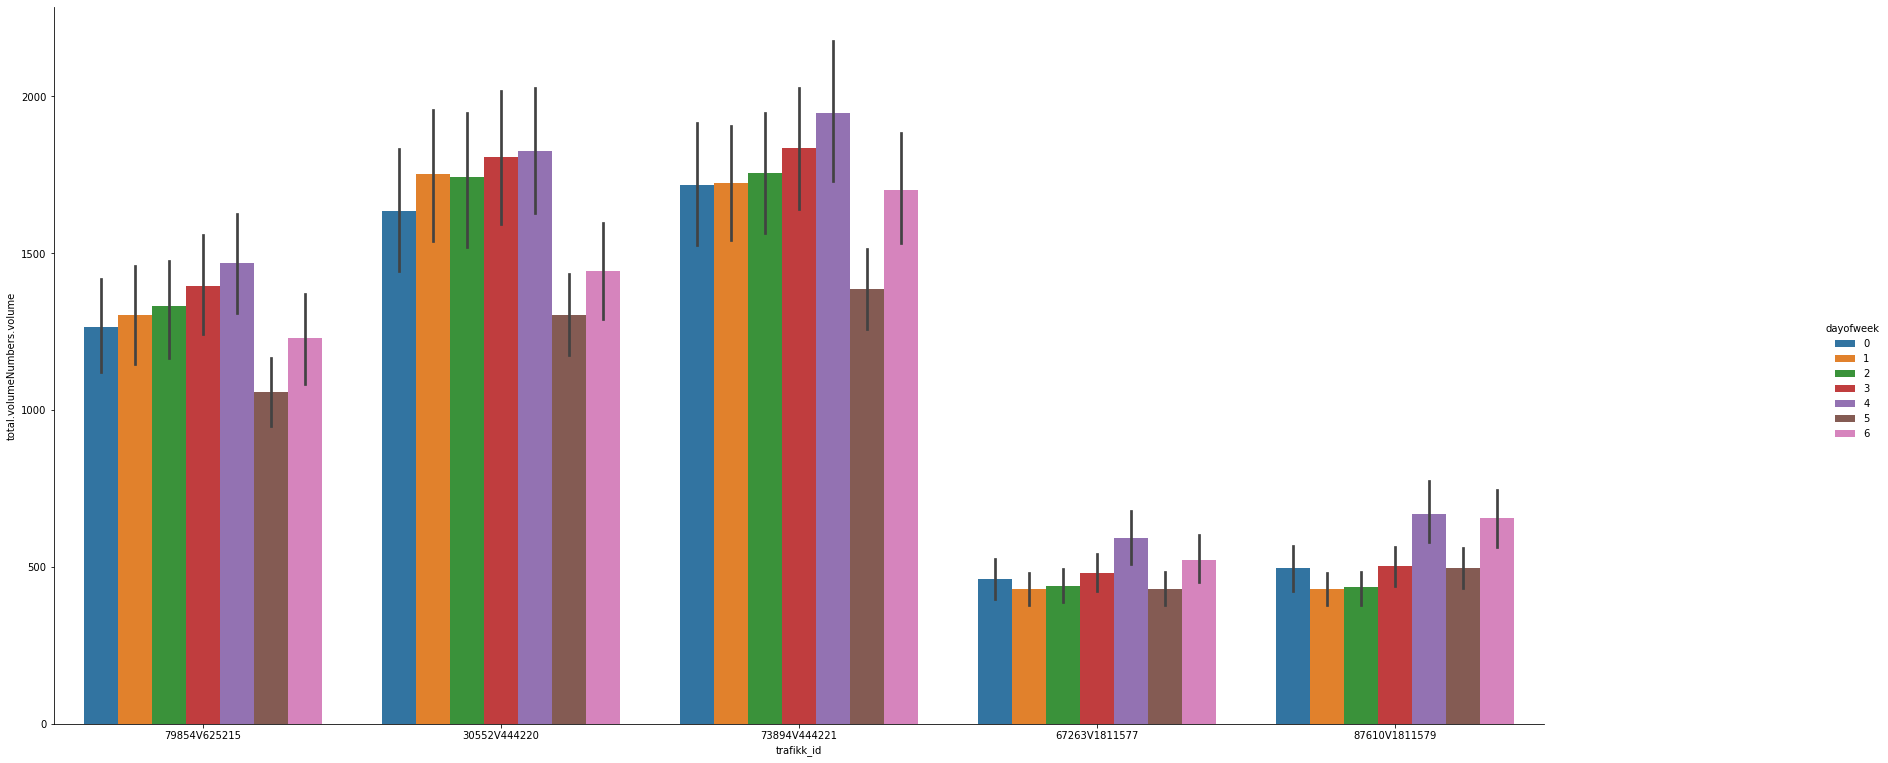

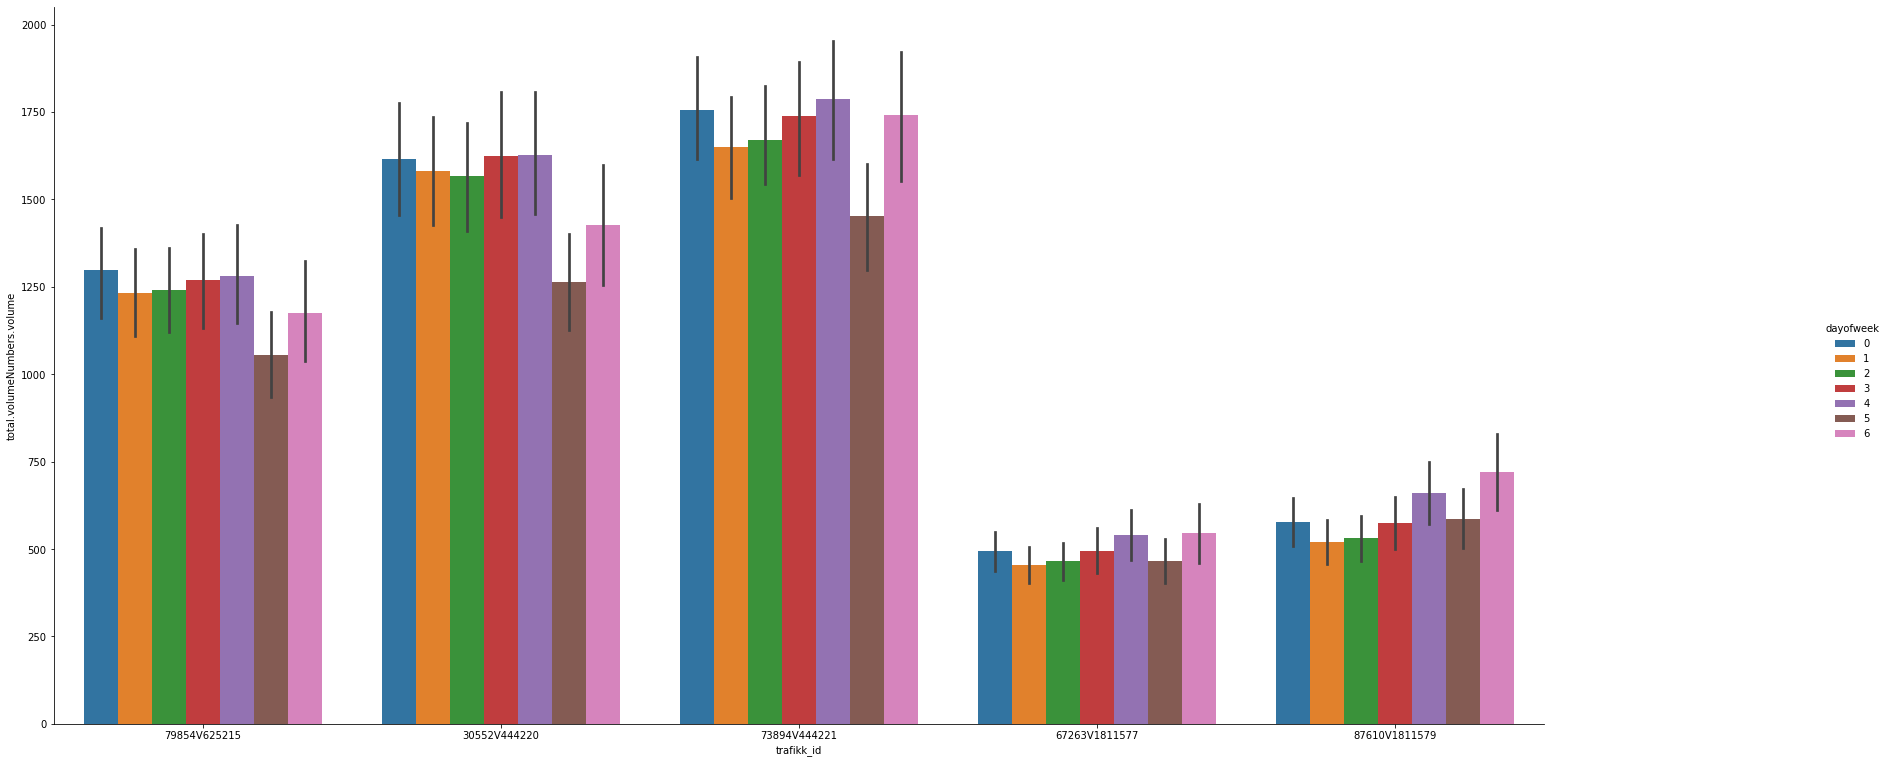

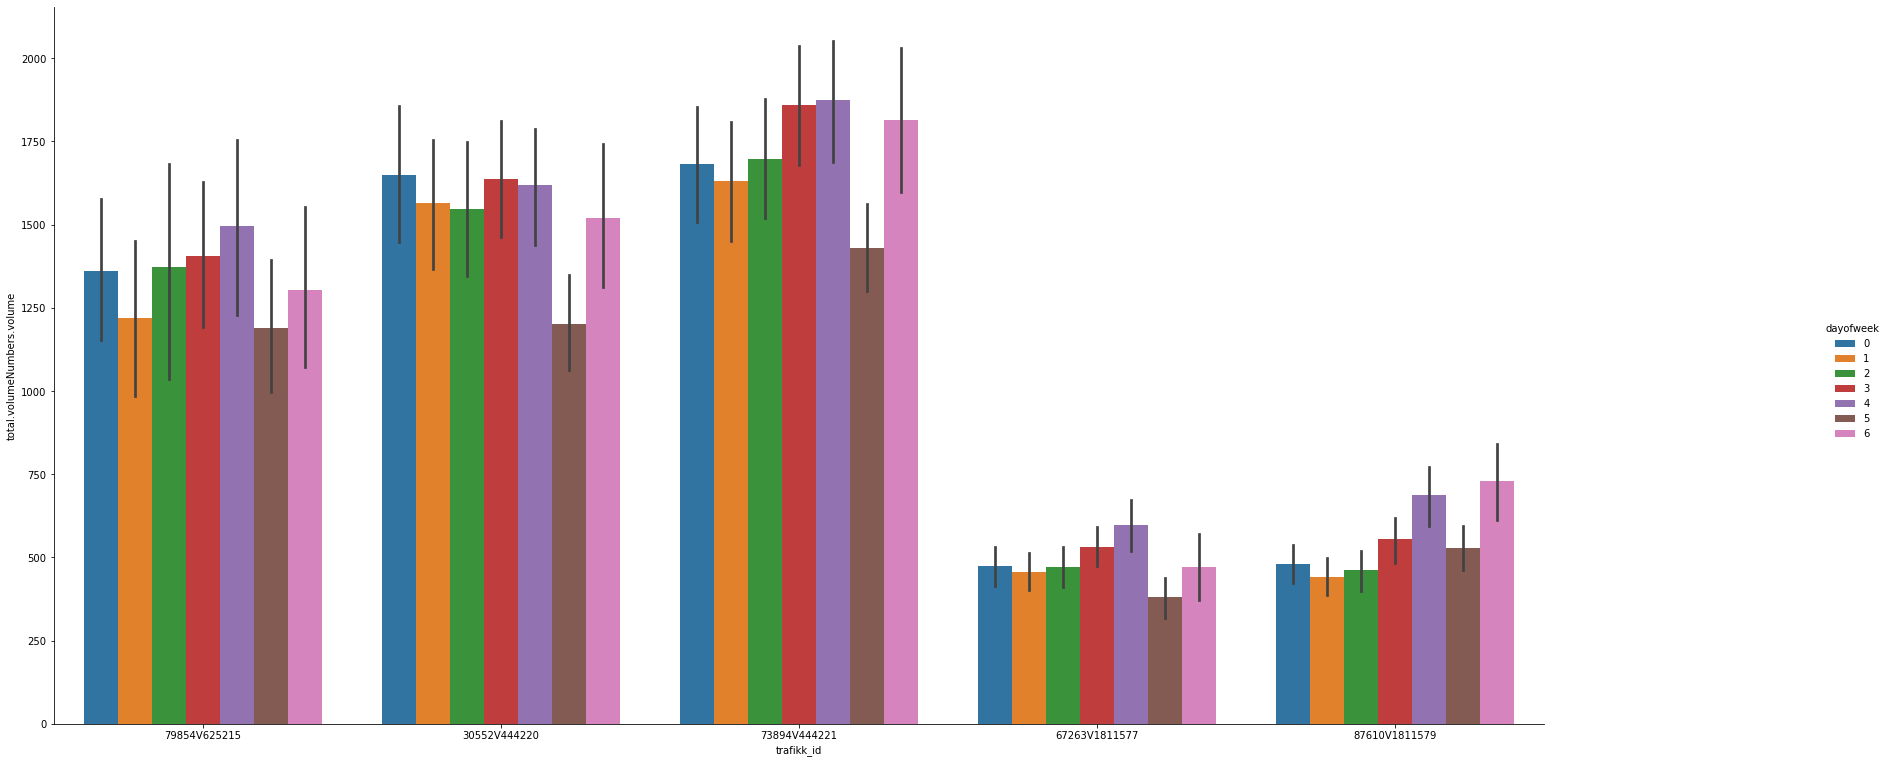

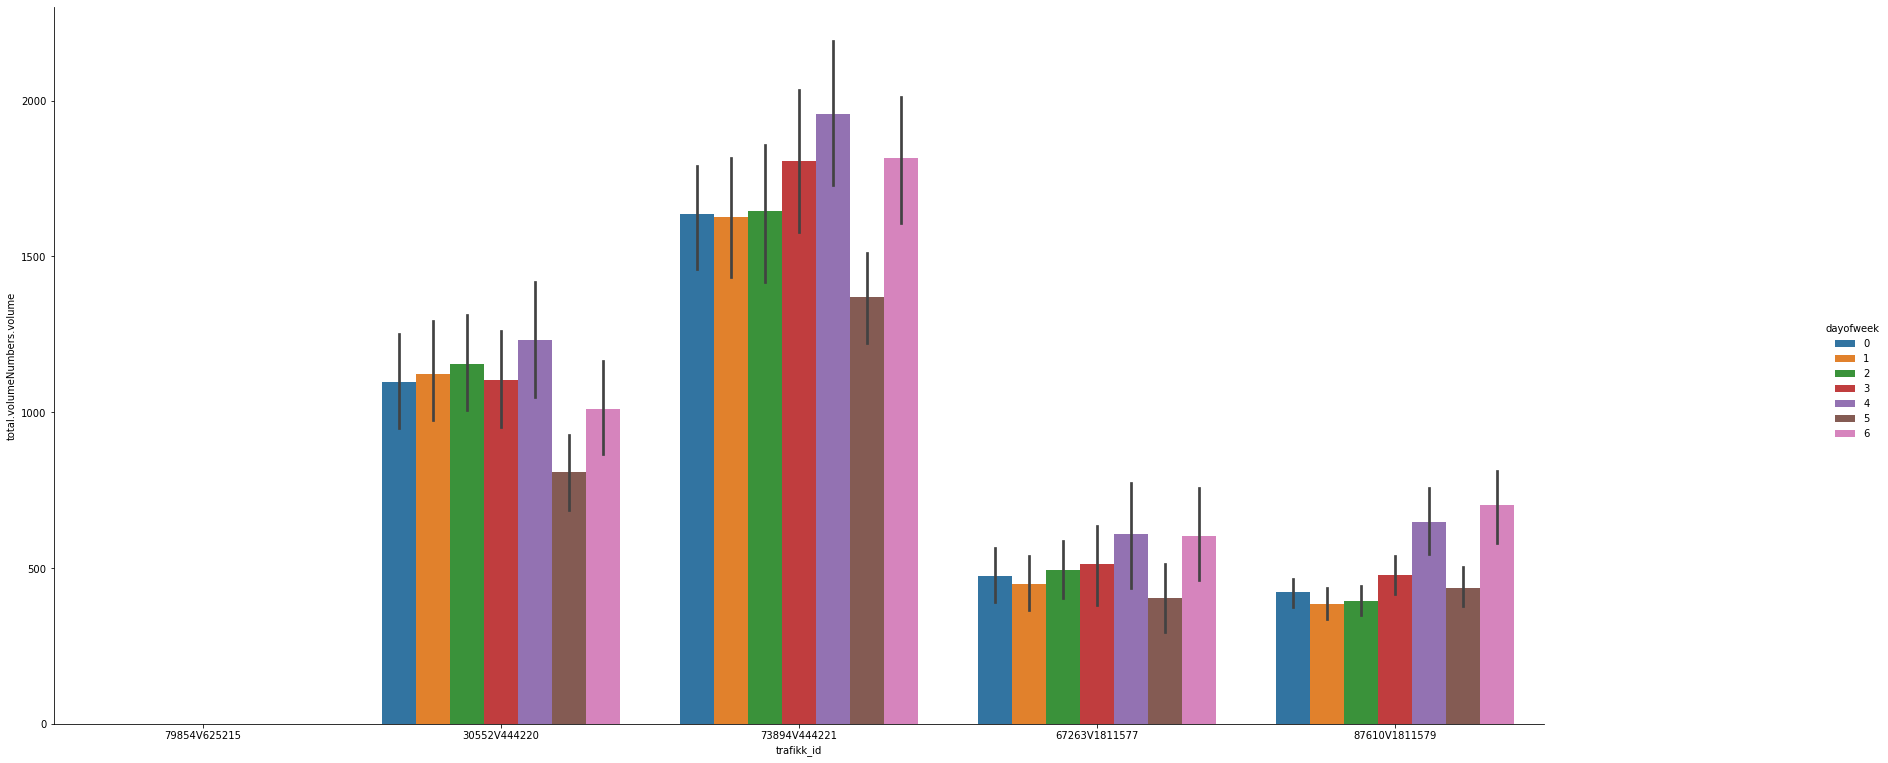

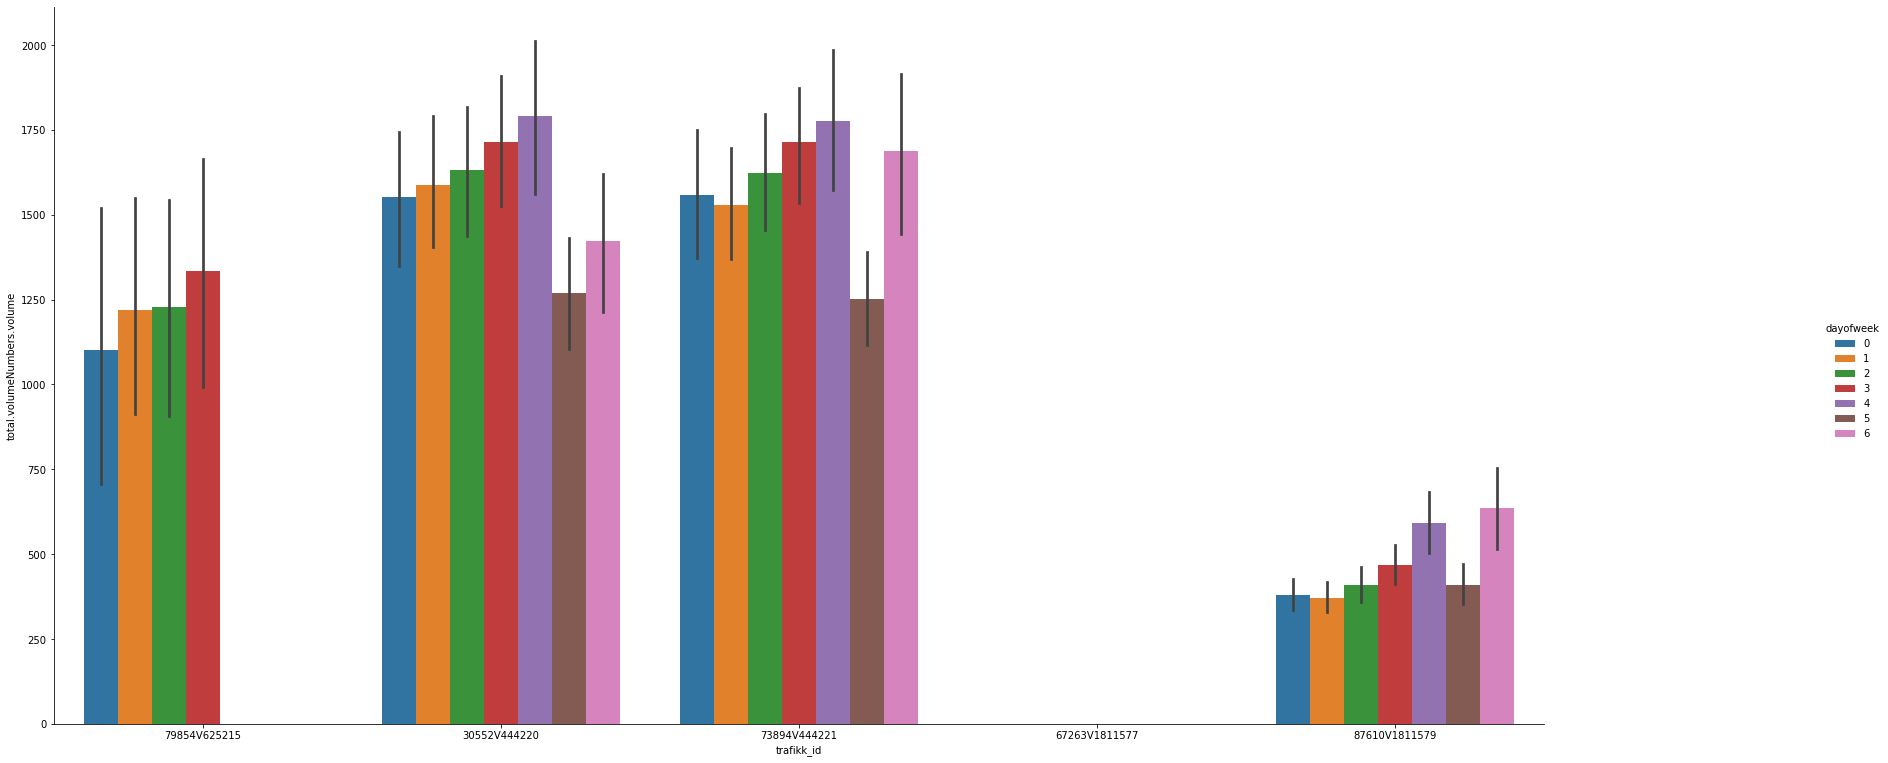

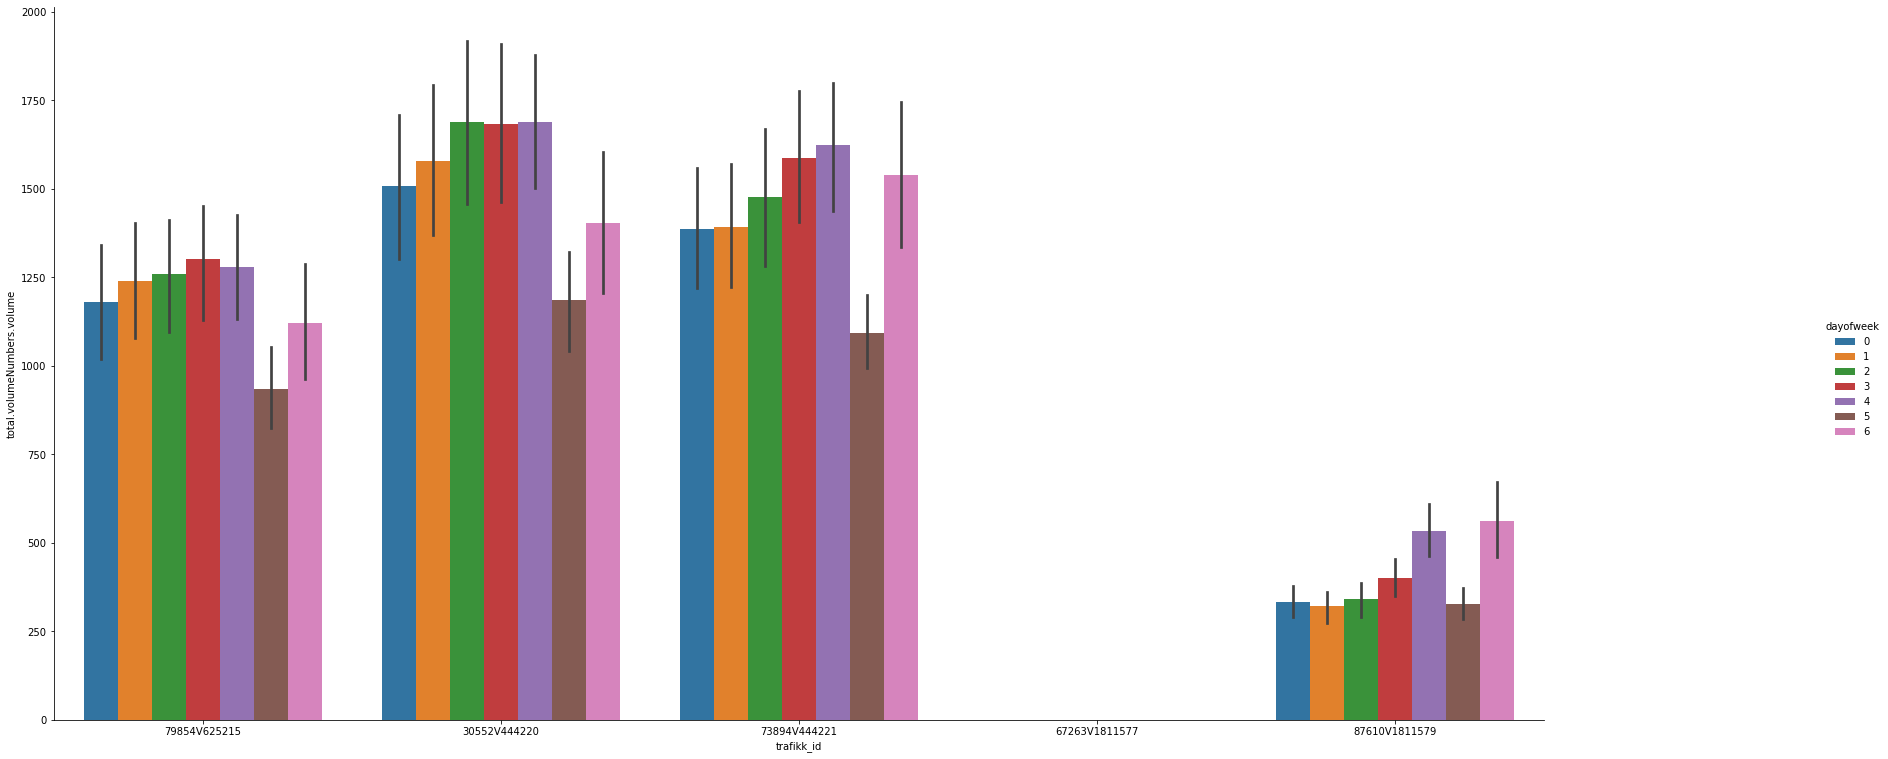

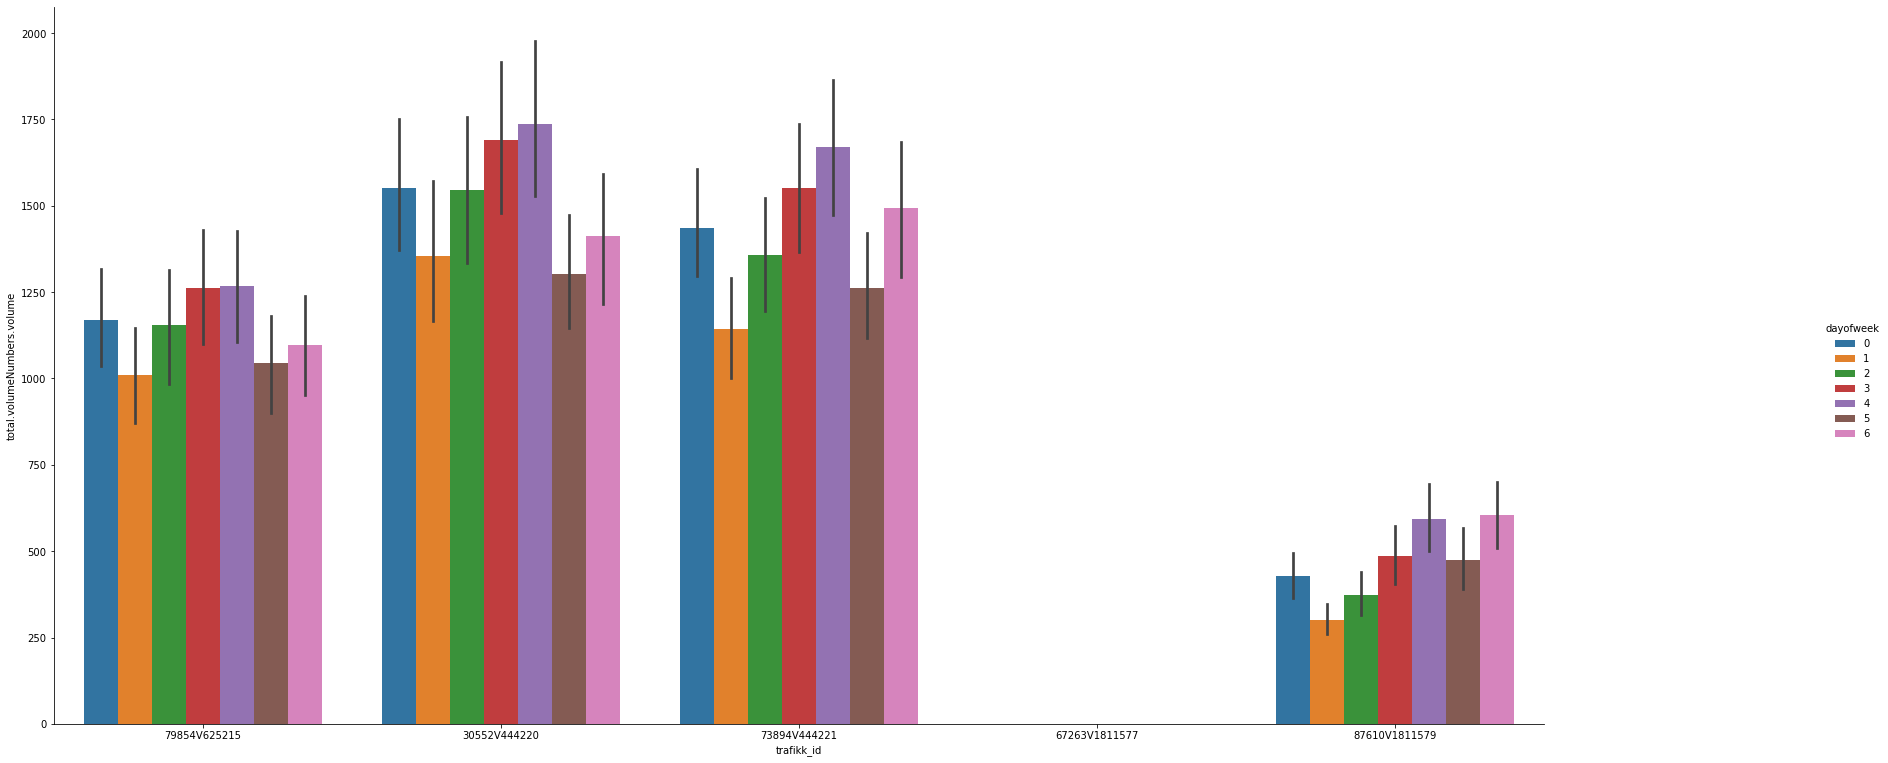

12


In [414]:
l = []
palette=sns.color_palette('Paired', n_colors=7)

for i in range (201901,201913):
    i = str(i)
    df_plot = df_total[df_total['YYYYMM'] == i]
    l.append(df_plot)
 
    g = sns.catplot(kind = 'bar', y='total.volumeNumbers.volume', x= 'trafikk_id', data = df_plot, hue = 'dayofweek', order = ['79854V625215','30552V444220', '73894V444221', '67263V1811577', '87610V1811579']   )#[df_total['dayofweek'] == 6] )
#sns.set(rc={'figure.figsize':(11.7,40.27)})



    g.fig.set_figwidth(30.27)
    g.fig.set_figheight(11.7)



#    ax = sns.barplot(x=df_plot.index, y='total.volumeNumbers.volume', data = df_plot )
#    ax.set_title(i)
#    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#    sns.lineplot(x=df_plot.index.hour, y=df_plot['total.volumeNumbers.volume'], palette=palette, hue=df_plot['dayofweek']).set_title(i)
#    for label in ax.xaxis.get_ticklabels()[::2]:
#        label.set_visible(False)
    plt.show()
print(len(l))



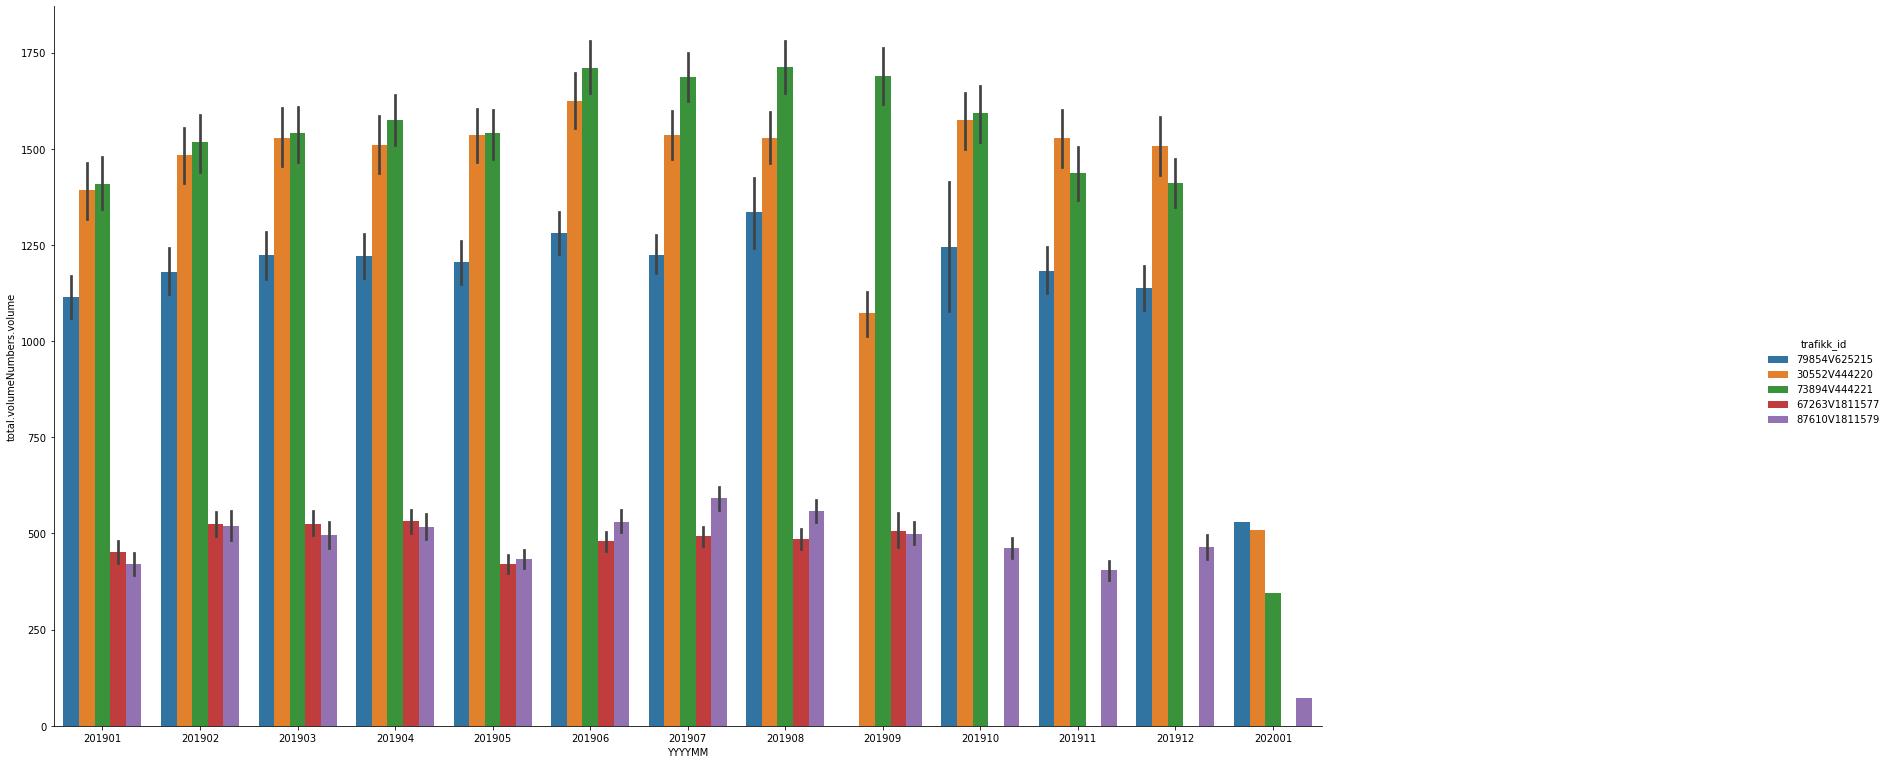

In [425]:
g = sns.catplot(kind = 'bar', y='total.volumeNumbers.volume', x= 'YYYYMM', data = df_total, hue = 'trafikk_id', hue_order = ['79854V625215','30552V444220', '73894V444221', '67263V1811577', '87610V1811579']   )#[df_total['dayofweek'] == 6] )

g.fig.set_figwidth(30.27)
g.fig.set_figheight(11.7)

In [418]:
df_total.columns

Index(['trafikk_id', 'total.volumeNumbers.volume',
       'total.volumeNumbers.volume[5.6,..)',
       'total.volumeNumbers.volume[5.6,7.6)',
       'total.volumeNumbers.volume[7.6,12.5)',
       'total.volumeNumbers.volume[12.5,16.0)',
       'total.volumeNumbers.volume[16.0,24.0)',
       'total.volumeNumbers.volume[24.0,..)', 'dayofweek', 'YYYYMM'],
      dtype='object')

In [434]:
df_total.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', name='node.to', length=41781)

In [444]:
df_sammen = pd.concat([df_Dalskrysset, df_mogreina], axis=0)

In [445]:
df_sammen = df_sammen.groupby(['YYYYMM', 'trafikk_id']) 

In [446]:
df_sammen['total.volumeNumbers.volume'].describe()

count        mean         std   min     25%    50%  \
YYYYMM trafikk_id                                                          
201901 67263V1811577  645.0  452.736434  359.659300   7.0  129.00  442.0   
       87610V1811579  646.0  420.082043  389.177158   8.0  103.25  377.0   
201902 67263V1811577  672.0  524.130952  426.025941  11.0  140.75  497.5   
       87610V1811579  672.0  519.699405  488.420092   8.0  113.00  433.0   
201903 67263V1811577  744.0  525.342742  428.886357   8.0  141.75  505.0   
       87610V1811579  744.0  495.098118  466.462816   7.0  113.75  430.5   
201904 67263V1811577  720.0  531.197222  402.715477   8.0  151.00  521.5   
       87610V1811579  720.0  517.422222  445.006102  13.0  125.50  455.5   
201905 67263V1811577  742.0  419.512129  324.808764   0.0   93.00  434.0   
       87610V1811579  744.0  434.206989  320.070509  13.0  124.50  446.0   
201906 67263V1811577  716.0  479.266760  331.056706  18.0  155.75  501.5   
       87610V1811579  720.0  530.150000  391.597019  22.0  165.00  517.0   
201907 67263V1811577  744.0  492.465054  327.854244  33.0  154.75  469.5   
       87610V1811579  744.0  591.491935  415.557058  37.0  173.00  537.0   
201908 67263V1811577  744.0  485.279570  371.436993   0.0  108.00  512.0   
       87610V1811579  744.0  558.232527  415.611377  19.0  160.75  538.5   
201909 67263V1811577  260.0  506.484615  372.221148  15.0  130.75  521.5   
       87610V1811579  720.0  499.826389  406.113783  13.0  124.50  491.0   
201910 67263V1811577    0.0         NaN         NaN   NaN     NaN    NaN   
       87610V1811579  744.0  461.967742  379.406910   8.0  122.75  457.5   
201911 67263V1811577    0.0         NaN         NaN   NaN     NaN    NaN   
       87610V1811579  720.0  404.641667  339.237781   7.0  112.75  393.5   
201912 67263V1811577    0.0         NaN         NaN   NaN     NaN    NaN   
       87610V1811579  744.0  464.262097  426.192441  12.0  101.00  392.0   
202001 67263V1811577    0.0         NaN         NaN   NaN     NaN    NaN   
       87610V1811579    1.0   73.000000         NaN  73.0   73.00   73.0   

                         75%     max  
YYYYMM trafikk_id                     
201901 67263V1811577  678.00  1711.0  
       87610V1811579  575.50  2139.0  
201902 67263V1811577  755.00  1851.0  
       87610V1811579  707.75  2313.0  
201903 67263V1811577  776.00  1916.0  
       87610V1811579  659.25  2112.0  
201904 67263V1811577  806.50  1678.0  
       87610V1811579  725.00  2150.0  
201905 67263V1811577  656.50  1466.0  
       87610V1811579  631.50  1411.0  
201906 67263V1811577  715.25  1317.0  
       87610V1811579  764.25  1700.0  
201907 67263V1811577  787.00  1263.0  
       87610V1811579  950.25  1537.0  
201908 67263V1811577  765.75  1510.0  
       87610V1811579  812.25  1878.0  
201909 67263V1811577  737.00  1468.0  
       87610V1811579  700.25  1747.0  
201910 67263V1811577     NaN     NaN  
       87610V1811579  647.25  2146.0  
201911 67263V1811577     NaN     NaN  
       87610V1811579  585.00  1628.0  
201912 67263V1811577     NaN     NaN  
       87610V1811579  643.25  2163.0  
202001 67263V1811577     NaN     NaN  
       87610V1811579   73.00    73.0

In [451]:
df_672 = df_sammen.iloc[3:3]



AttributeError: 'DataFrameGroupBy' object has no attribute 'iloc'

In [452]:
type(df_sammen)

pandas.core.groupby.generic.DataFrameGroupBy

In [448]:
df_sammen['total.volumeNumbers.volume'].mean()

YYYYMM  trafikk_id   
201901  67263V1811577    452.736434
        87610V1811579    420.082043
201902  67263V1811577    524.130952
        87610V1811579    519.699405
201903  67263V1811577    525.342742
        87610V1811579    495.098118
201904  67263V1811577    531.197222
        87610V1811579    517.422222
201905  67263V1811577    419.512129
        87610V1811579    434.206989
201906  67263V1811577    479.266760
        87610V1811579    530.150000
201907  67263V1811577    492.465054
        87610V1811579    591.491935
201908  67263V1811577    485.279570
        87610V1811579    558.232527
201909  67263V1811577    506.484615
        87610V1811579    499.826389
201910  67263V1811577           NaN
        87610V1811579    461.967742
201911  67263V1811577           NaN
        87610V1811579    404.641667
201912  67263V1811577           NaN
        87610V1811579    464.262097
202001  67263V1811577           NaN
        87610V1811579     73.000000
Name: total.volumeNumbers.volume, dtype: f

In [453]:
type(df_sammen['total.volumeNumbers.volume'].mean())

pandas.core.series.Series

In [468]:
df_sammen['total.volumeNumbers.volume'].mean().iloc[[0,1]]

YYYYMM  trafikk_id   
201901  67263V1811577    452.736434
        87610V1811579    420.082043
Name: total.volumeNumbers.volume, dtype: float64

In [469]:
type(df_sammen['total.volumeNumbers.volume'].mean().iloc[[0,1]])

pandas.core.series.Series

In [473]:
df_sammen['total.volumeNumbers.volume'].mean().iloc[[0,1]].iloc[1]

420.08204334365325

In [474]:
df_sammen['total.volumeNumbers.volume'].mean().iloc[[0,0]].iloc[1]

452.73643410852713